# 1. Intro

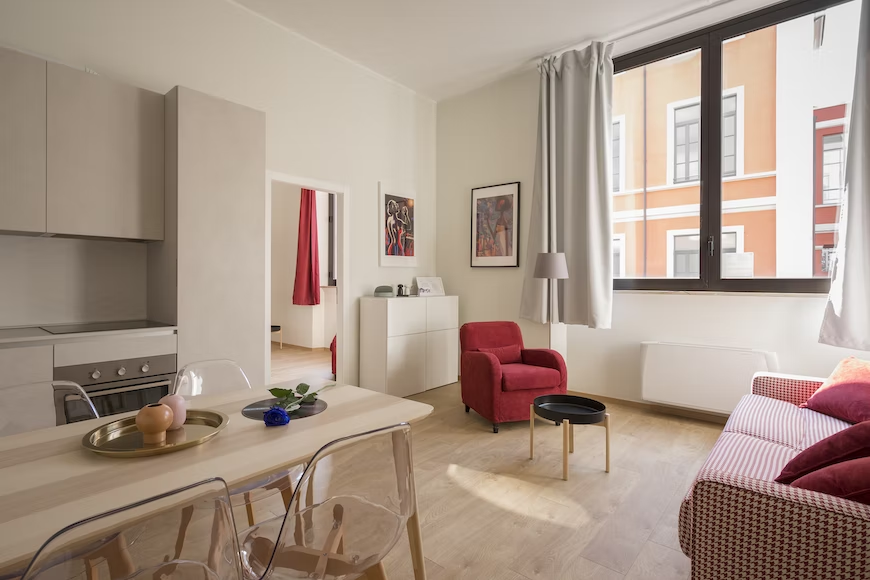

데이커 여러분 안녕하세요 👋

Stage 1 복습은 열심히 하셨나요?

Stage 2에서는 데이터가 어떻게 생겼는지 시각화해보고

앞으로 데이터를 가지고 우리가 해야 할 방향을 살펴보도록 합시다 !

---

# 2. EDA 및 시각화의 개념

**<font color=red>EDA(Exploratory Data Analysis)란??</font>**

: **탐색적 데이터 분석**으로 데이터를 다양한 관점에서 바라보고 데이터를 이해하는 과정입니다 !

요리를 할 때 재료의 특성을 알아야 맛있는 음식이 완성되듯이 데이터에 대해 잘 이해해야 좋은 분석 및 예측결과를 낼 수 있겠죠?

**<font color=red>데이터 시각화</font>**도 EDA 과정 중 하나에 속합니다 !

데이터 시각화를 통해 데이터를 한눈에 알아볼 수 있게 만들면 데이터를 이해하는데 더 유리하답니다.




앗 여기서 잠깐 ✋

Stage 1에서 잠깐 배웠던 **<font color=green>범주형변수</font>**와 **<font color=green>수치형변수</font>**에 대해서 복습해볼까요?





- **범주형변수**는 성별, 지역 등 관측결과가 항목으로 나타나는 것을 뜻하고,

- **수치형변수**는 키, 몸무게 등 관측결과가 수치로 나타나는 것을 뜻합니다.

시각화를 할 때 알고 있으면 도움이 되니 **<font color=green>꼭!**</font> 기억해두세요~✨

---

# 3. EDA 및 시각화

## 3.1 패키지 및 데이터 불러오기

그렇다면 데이커 여러분들이 직접 코드셀을 실행해보면서 데이터를 분석해보는 시간을 갖겠습니다 !

다들 준비되셨죠? 🤗

In [ ]:
import micropip
await micropip.install('seaborn')

In [ ]:
# 파이썬 warning 무시
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# 시각화를 위한 라이브러리
import matplotlib.font_manager as fm

# 한글 폰트를 사용하기 위한 코드
fe = fm.FontEntry(fname = 'NotoSansKR-Regular.otf', name = 'NotoSansKR')
fm.fontManager.ttflist.insert(0, fe)
plt.rc('font', family='NotoSansKR')

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use("fivethirtyeight")

pandas 패키지는 Stage 1에서 배운 기억이 나시죠?



이제는 새로운 패키지들을 불러올 거에요.

패키지 소개 들어갑니다 !

① **import numpy as np**
  
  배열과 벡터 계산을 하기 위한 패키지에요 !



② **import matplotlib.pyplot as plt, import seaborn as sns**

   대표적인 시각화 패키지입니다 !
   이 두 패키지에 대해서는 밑에서 자세하게 설명하겠습니다.



③ **plt.style.use("fivethirtyeight")**

그래프를 좀 더 아름답게 만들어주는 역할을 해요. <font color=orange>**plt.style.use('그래프스타일')**</font>의 형태로 사용한답니다 !

> `plt.style.available`을 실행하면 적용가능한 그래프 스타일을 모두 볼수 있어요.😉



④ **plt.rc('font', family='NanumBarunGothic')**<br>
  그래프에서 한글지원을 하게 하는 패키지 입니다! 이 패키지를 불러오지 않으면 한글이 네모(▯)로 표시되어 읽을 수가 없어요;; 😥

  따라서 그래프에 한글이 들어간다면 필수입니다...

>  <font color=orange>**plt.rc('font', family='폰트명')**</font>의 형태로 주로 사용하고 NanumBarunGothic 폰트를 많이 사용합니다.


---

아래 코드셀을 실행해 분석할 train 데이터를 불러보고 head(2)를 이용해 앞 2개의 데이터를 확인해봅시다.

In [ ]:
train = pd.read_csv('train.csv')

In [ ]:
train.head(2)

,transaction_id,apartment_id,city,dong,jibun,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,transaction_real_price
0,0,7622,서울특별시,신교동,6-13,신현(101동),신교동 6-13 신현(101동),84.82,2002,200801,21~31,2,37500
1,1,5399,서울특별시,필운동,142,사직파크맨션,필운동 142 사직파크맨션,99.17,1973,200801,1~10,6,20000


---

## 3.2 데이터 가공

### transaction_year_month

train 데이터의 **transaction_year_month** 컬럼을 한번 봅시다. 6자리의 숫자로 이루어져 있죠?









거래연도와 월이 합쳐져 있어서 보기 불편하네요! 😅


그래서 우리는 **transaction_year_month**를 아래처럼 연도, 월으로 분리하려고 합니다.

> 200801 → 2008년 01월

어떻게 해야할까요?🤔🤔🤔

**<font color=red>데이터프레임['컬럼명'].astype(데이터타입)</font>**

이렇게 특정 컬럼의 데이터 타입을 바꿔줄 수 있습니다.



> ※ 보통 데이터 타입에는 int(정수), str(문자)를 많이 써요.🤓🤓🤓

그렇다면!!!



 **astype(str)**를 이용해서 데이터 타입을 문자형으로 바꾼후, 
 
 앞의 4글자는 **연도**, 4글자 이후로는 **월**로 분리해봅시다.



그 다음,  **astype(int)**를 이용해서 원래 데이터 타입인 정수 형식으로 다시 바꿔봅시다 !

잘 분리되었는지 head()로 확인하는 것도 잊지 말자구요!


In [ ]:
# transaction_year_month에서 연도와 월을 분리해봅시다.
train['year'] = train['transaction_year_month'].astype(str).str[:4].astype(int)
train['month'] = train['transaction_year_month'].astype(str).str[4:].astype(int)

In [ ]:
train.head()

,transaction_id,apartment_id,city,dong,jibun,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,transaction_real_price,year,month
0,0,7622,서울특별시,신교동,6-13,신현(101동),신교동 6-13 신현(101동),84.82,2002,200801,21~31,2,37500,2008,1
1,1,5399,서울특별시,필운동,142,사직파크맨션,필운동 142 사직파크맨션,99.17,1973,200801,1~10,6,20000,2008,1
2,2,3578,서울특별시,필운동,174-1,두레엘리시안,필운동 174-1 두레엘리시안,84.74,2007,200801,1~10,6,38500,2008,1
3,3,10957,서울특별시,내수동,95,파크팰리스,내수동 95 파크팰리스,146.39,2003,200801,11~20,15,118000,2008,1
4,4,10639,서울특별시,내수동,110-15,킹스매너,내수동 110-15 킹스매너,194.43,2004,200801,21~31,3,120000,2008,1


---

### transaction_date

Stage 1에서 학습했던 **<font color=purple>value_counts()</font>**를 기억하시죠???😁 

value_counts()를 사용해서 transaction_date의 **<font color=purple>**범주 개수</font>를 세어 봅시다. 

In [ ]:
train['transaction_date'].value_counts()

11~20    408385
1~10     391715
21~31    250588
21~30    134017
21~28     22199
21~29      9649
Name: transaction_date, dtype: int64

어라라 🙄 

근데, 21\~31, 21\~30, 21\~28, 21\~29은 중복되는 기간 아닌가요 ?





아마 9월은 30일까지 있고, 2월은 28일까지 있는 등 월마다 일수가 달라서 그런 거 같아요.

우리는 **<font color=darkblue>월초, 월중, 월말</font>**의 세 구간으로 나눠봅시다!



Stage 1에서 배웠던 **<font color=darkblue>loc</font>**를 이용해서 말이에요.



아래 코드셀을 실행해봅시다.

In [ ]:
# transaction_date에서 21~31, 21~30, 21~28, 21~29에 해당하는 값을 21~31로 변환해봅시다.
train.loc[(train['transaction_date'] == '21~30') | (train['transaction_date'] == '21~28') | (train['transaction_date'] == '21~29'), 'transaction_date'] = '21~31'

In [ ]:
train['transaction_date'].value_counts()

21~31    416453
11~20    408385
1~10     391715
Name: transaction_date, dtype: int64

월초, 월중, 월말으로 올바르게 분류된 것을 볼 수 있죠?

---

## 3.3 matplotlib & seaborn 사용해보기

이제 다양한 그래프를 통해 데이터를 살펴보겠습니다.<br>
주로 사용되는 시각화 패키지는 **<font color=red>matplotlib</font>**과 **<font color=green>seaborn</font>**이 있습니다 🤗



**<font color=green>seaborn</font>**은 matplotlib보다 **<font color=green>간결</font>**하고 **<font color=green>깔끔</font>**한 시각화가 가능하지만

seaborn은 **<font color=red>matplotlib</font>**을  **<font color=red>베이스</font>**로 두기 때문에 두 사용법을 모두 익히는 것이 좋습니다.<br>




먼저, seabon과 matplotlib에 모두 공통적으로 사용되는 기본 문법부터 학습해보겠습니다.

다들 준비되셨죠?😉😉😉

① **plt.figure(figsize=(가로크기, 세로크기))**

<font color=green>그래프의 크기</font>를 조절하는데 사용합니다.



② **plt.그래프 종류() or sns.그래프 종류()**

사용하고 싶은 <font color=green>그래프의 종류</font>에 따라 맞춰서 그래프 종류를 사용해야하고 패키지에 맞는 그래프 종류를 사용하면 됩니다 !




③ **plt.title('그래프 제목', size = ▯)**

<font color=green>그래프의 제목과 크기</font>를 지정합니다.



④ **plt.xticks()**

그래프의 <font color=green>x축</font>의 눈금을 세부적으로 설정합니다.



⑤ **plt.yticks()**

그래프의 <font color=green>y축</font>의 눈금을 세부적으로 설정합니다.



⑥ **plt.xlabel('x축 이름', size = ▯)**

<font color=green>x축의 이름 및 크기</font> 등을 설정합니다.



⑦ **plt.ylabel('y축 이름', size = ▯)**

<font color=green>y축의 이름 및 크기</font> 등을 설정합니다.

그래프를 그릴 때는 위 순서를 그대로 유지하고

그래프 종류에 따라 **<font color=#46c7c7>② plt.그래프종류() or sns.그래프 종류()</font>**만 바꿔가면서 그려보도록 해요 😜

여기서 꿀팁 🍯🍯🍯


그래프를 그릴 때 **<font color=red>plt.show()</font>**를 넣게되면 필요없는 글씨가 출력되지 않아 보기 깔끔해집니다~

그래프를 그리고 난 후 마지막에 **<font color=red>plt.show()</font>**를 넣어 깔끔한 그래프를 그려봐요 !

---

## pie chart

**<font color=red>pie chart</font>**는 전체에 대해 각 부분의 비율을 부채꼴 모양으로 나타낸 그래프를 말합니다.



다들 뉴스에서 많이 보셨죠 ?



- 전체적인 **<font color=blue>비율</font>**을 한눈에 쉽게 파악할 수 있다는 장점이 있습니다.
- 주로 **<font color=blue>범주형 변수</font>**들이 차지하는 비율을 한눈에 보여줄 때 사용해요.



그러나 파이차트는 안타깝게도 seaborn에서는 제공하지 않고, **<font color=green>matplotlib</font>**에서만 제공한답니다.

파이차트는 **<font color=orange>plt.pie(data, labels, colors, autopct)</font>**의 형식으로 사용합니다.



* data : pie chart에 사용할 데이터
* labels : 각 부채꼴의 레이블
* colors : 각 부채꼴의 색상
* autopct : 비율의 표시 형식

그러면 서울특별시와 부산광역시의 아파트 거래 데이터 비율을 파이차트로 확인해보겠습니다 !



먼저 도시별 데이터 개수를 먼저 구한 후 **seoul_busan**로 할당해봅시다.

In [ ]:
seoul_busan = train['city'].value_counts()
seoul_busan

서울특별시    742285
부산광역시    474268
Name: city, dtype: int64

파이차트는 x축과 y축이 없으니 눈금설정이나 축 이름은 설정하지 않고 그래프를 그려봐요 🤗

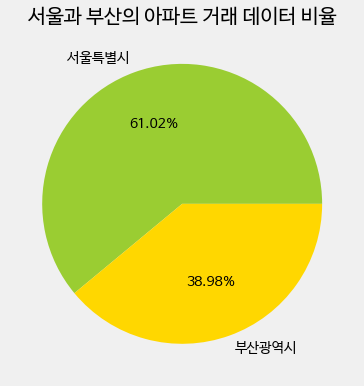

In [ ]:
# matplotlib의 plt.pie()를 이용해 파이차트를 그려봅시다.

color = ['yellowgreen', 'gold']
langs = ['서울특별시', '부산광역시']

plt.figure(figsize=(8,6))
plt.pie(seoul_busan, labels=langs, colors=color,  autopct='%.2f%%')
plt.title('서울과 부산의 아파트 거래 데이터 비율', size=20)
plt.show()

도시별 아파트 거래 데이터 비율을 한눈에 볼 수 있지 않나요? 🧐

서울특별시의 거래 데이터가 부산광역시보다 약 1.5배 많은 것이 한눈에 보이네요 ! </br>



여기서 잠깐, `autopct='%.2f%%'`가 뭘까요???

비율을 **<font color=purple>소수 둘째자리까지 표시</font>**(%.2f%)하고 뒤에 **<font color=purple>%</font>(%)<font color=purple>까지 같이 표시</font>**하라는 의미랍니다.

---

## countplot

범주형 데이터의 범주 개수가 많으면 pie chart를 통해 크기를 비교하기 불편해지는데요,,, 😨😨😨

이럴 때 사용하는 것이 **<font color=red>countplot</font>**입니다.

countplot은 이럴 때 사용합니다.

- 범주형 데이터의 **<font color=blue>고유한 값(value)의 개수</font>**를 세어 막대 그래프로 표현할 때 주로 사용합니다.

countplot을 그리기 위해서




* matplotlib을 사용할 때에는 원하는 변수에 대한 count table을 만든 후, <font color=orange>plt.bar(x축 값, y축 값)</font>
* seaborn을 사용할 때에는 <font color=orange>sns.countplot(x = x축에 사용할 칼럼, data= 사용할 데이터)</font>

을 사용합니다.

먼저, <font color=green>연도에 따른 아파트 거래량</font>을 matplotlib을 사용하여 그려보겠습니다.

---

### 일변량 countplot

In [ ]:
# 연도별 count table을 만들어봅시다.
train_year_count = train['year'].value_counts().sort_index(ascending=True)
train_year_count

2008    100066
2009    127869
2010    102823
2011     98586
2012     70065
2013    109738
2014    136649
2015    181195
2016    165664
2017    123898
Name: year, dtype: int64

matplotlib을 이용하여 countplot을 그리기 위해서 연도별 count table을 작성했습니다.





여기서 `.sort_index(ascending=True)`는 무엇일까요???

**인덱스**(연도)를 기준으로 **오름차순** 정렬한다는 뜻입니다. 

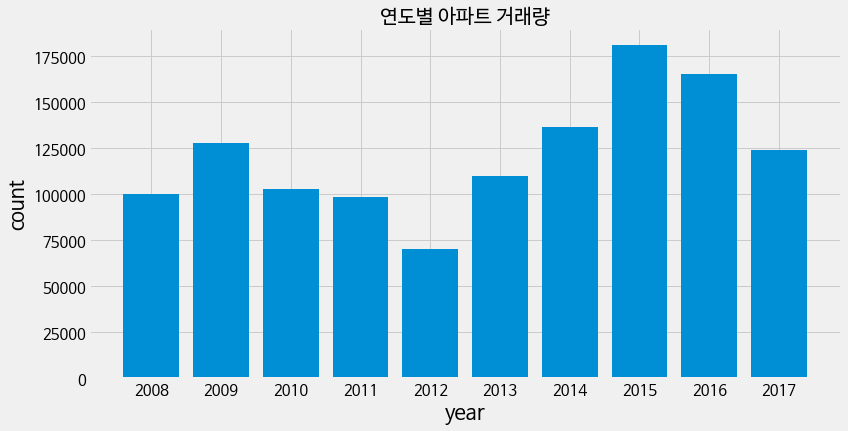

In [ ]:
# matplotlib을 이용하여 연도별 아파트 거래량을 나타내봅시다.

plt.figure(figsize = (12,6))
plt.bar(train_year_count.index.astype(str), train_year_count.values)
plt.title('연도별 아파트 거래량', size = 20)

plt.xticks(size = 15)
plt.yticks(size = 15)

plt.xlabel('year', size = 20)
plt.ylabel('count', size = 20)

plt.show()

위에서 만든 count table에 plt.bar()을 사용하여 countplot을 그려보았습니다.

연도가 많이 있는데도 한눈에 크기 비교가 가능하지 않나요?<br>




countplot을 보니 <font color=red>2012년에는 거래량이 가장 적고 2015년에 거래가 가장 많이 되었네요. </font>


---


다음으로 seaborn을 통해 같은 그래프를 그려보겠습니다. 🔥<br>

seaborn은 단지 matplotlib에서의 plt.bar()를 **sns.countplot()**으로 바꿔주면 됩니다!

(쉽죠?😉😉😉)

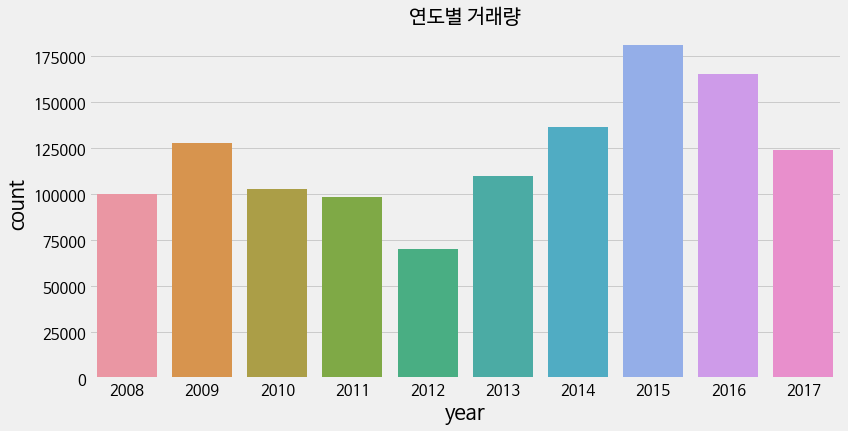

In [ ]:
# seaborn의 countplot을 이용하여 연도별 아파트 거래량을 나타내봅시다. 

plt.figure(figsize=(12, 6))
sns.countplot(x = 'year', data=train)
plt.title('연도별 거래량', size = 20)

plt.xticks(size = 15)
plt.yticks(size = 15)

plt.xlabel('year', size = 20)
plt.ylabel('count', size = 20)

plt.show()

우와! 그래프 색이 너무 예쁘지 않나요?👍<br>
이처럼 seaborn은 matplotlib에 비해 화려하고 깔끔한 그래프를 그릴 수 있습니다.(최고 최고)

---

이제 본격적으로 countplot을 사용하여 여러 범주형 데이터의 **<font color=blue>고유한 값(value)의 개수</font>**를 세어 그래프로 표현해보겠습니다.

먼저 위에서 했던 것과 마찬가지로 <font color=green>월별아파트 거래량</font> 그래프를 그리기 위해서 월별 count table을 작성하겠습니다.

In [ ]:
# 월별 count table을 만들어봅시다.
train_month_count = train['month'].value_counts().sort_index(ascending=True)
train_month_count

1      85622
2      95199
3     125958
4     115363
5     110536
6     109841
7     102973
8      96163
9     104061
10    111242
11     87592
12     72003
Name: month, dtype: int64

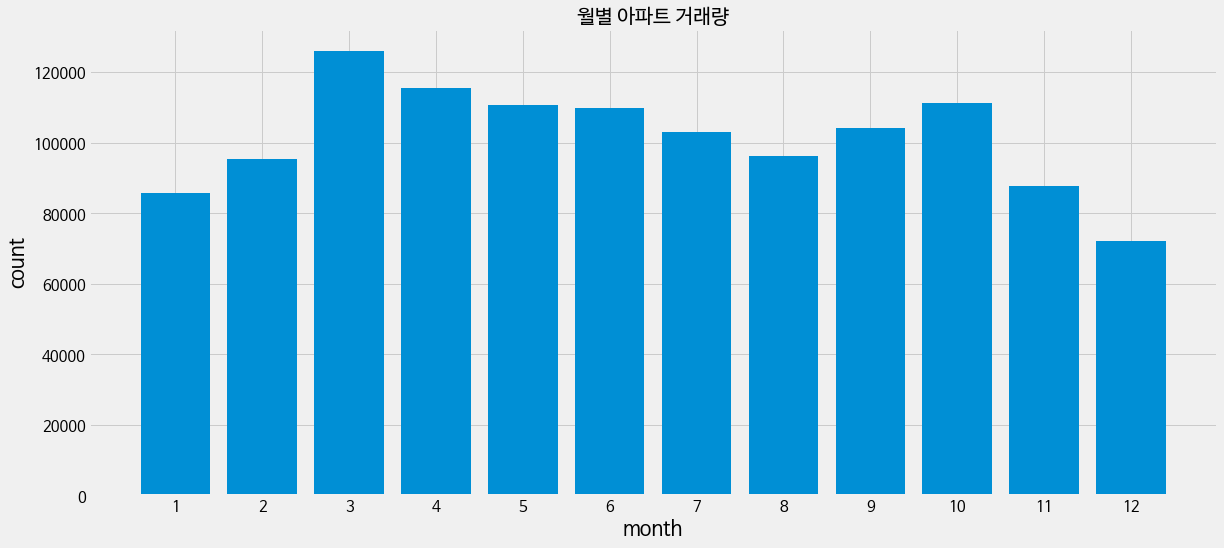

In [ ]:
# matplotlib을 이용하여 월별 아파트 거래량을 나타내봅시다.

plt.figure(figsize = (18,8))
plt.bar(train_month_count.index.astype(str), train_month_count.values)
plt.title('월별 아파트 거래량', size = 20)

plt.xticks(size = 15)
plt.yticks(size = 15)

plt.xlabel('month', size = 20)
plt.ylabel('count', size = 20)

plt.show()

3, 4, 5월에 거래량이 많고 12, 1, 2월에 거래량이 적은 게 한눈에 보이네요!




이를 통해 <font color=red>추운 겨울에 거래가 많이 안되었고, 날씨가 따뜻한 봄에 거래가 많이 되었음</font>을 알 수 있습니다.

---

다음으로 동일한 그래프를 seaborn을 통해 그려보겠습니다.

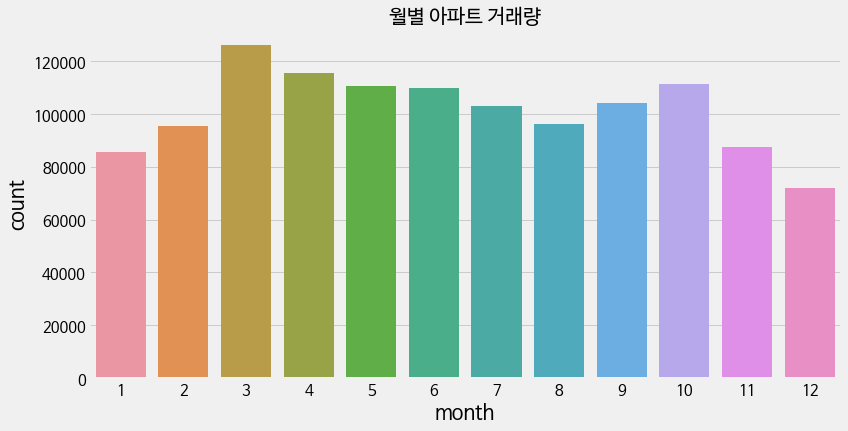

In [ ]:
# seaborn의 countplot을 이용하여 월별 아파트 거래량을 나타내봅시다.

plt.figure(figsize=(12, 6))
sns.countplot(x = 'month', data=train)
plt.title('월별 아파트 거래량', size = 20)

plt.xticks(size = 15)
plt.yticks(size = 15)

plt.xlabel('month', size = 20)
plt.ylabel('count', size = 20)

plt.show()

같은 그래프지만 보다 화려하고 멋지게 만들어졌네요!

---

다음으로 <font color=green>일별 아파트 거래량</font>을 **countplot**을 이용하여 그래프로 표현해보겠습니다.

In [ ]:
# 일별 count table을 만들어봅시다.
train_day_count = train['transaction_date'].value_counts().sort_index(ascending = False).to_frame()
train_day_count 

,transaction_date
21~31,416453
1~10,391715
11~20,408385


먼저, 일별 아파트 거래량 그래프를 그리기 위해서 일별 count table을 작성했습니다.<br>

이제 만들어 놓은 count table에 matplotlib을 적용하여 일별 아파트 거래량을 비교해 보겠습니다.

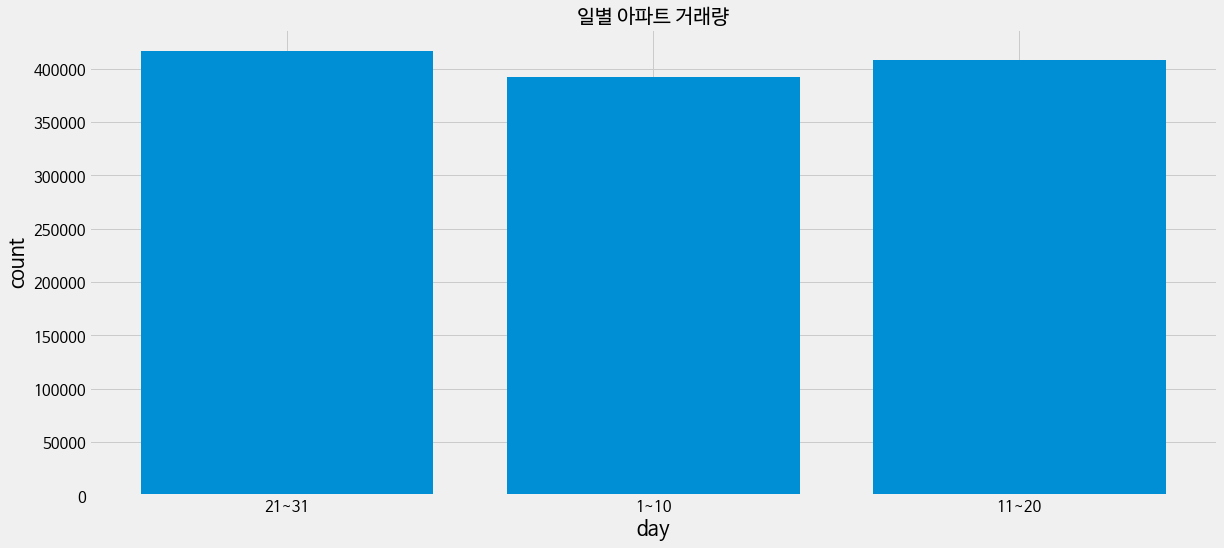

In [ ]:
# matplotlib 이용하여 일별 아파트 거래량을 나타내봅시다.

plt.figure(figsize = (18,8))
plt.bar(train_day_count.index, train_day_count['transaction_date'])
plt.title('일별 아파트 거래량', size = 20)

plt.xticks(size = 15)
plt.yticks(size = 15)

plt.xlabel('day', size = 20)
plt.ylabel('count', size = 20)

plt.show() 

그래프를 보니 월말에 거래가 약간 더 많이 되는 경향을 보이지만 크게 차이나진 않네요!

지금까지 countplot을 통해 여러 범주형 변수의 고유한 값(value)의 개수를 세어 그래프로 표현해 보았습니다.

countplot을 잊지 않기 위해 퀴즈를 통해 다시 한번 되짚고 넘어가도록 해요!

---

#### 퀴즈

In [ ]:
# seaborn을 이용해서 일별 아파트 거래량을 그래프로 나타내주세요.


##### 설명

sns.countplot()을 이용해서 막대 그래프를 그리되,

그래프 제목은 '일별 아파트 거래량',  x축 이름은 'day',  y축 이름은 'count'로 기입해주세요.

(글자 크기는 자유롭게 하셔도 됩니다.)

##### 풀이 - 힌트

① **plt.figure(figsize=(가로크기, 세로크기))**

<font color=green>그래프의 크기</font>를 조절하는데 사용합니다.



② **plt.그래프 종류() or sns.그래프 종류()**

사용하고 싶은 <font color=green>그래프의 종류</font>에 따라 맞춰서 그래프 종류를 사용해야하고 패키지에 맞는 그래프 종류를 사용하면 됩니다 !




③ **plt.title('그래프 제목', size = ▯)**

<font color=green>그래프의 제목과 크기</font>를 지정합니다.



④ **plt.xticks()**

그래프의 <font color=green>x축</font>의 눈금을 세부적으로 설정합니다.



⑤ **plt.yticks()**

그래프의 <font color=green>y축</font>의 눈금을 세부적으로 설정합니다.



⑥ **plt.xlabel('x축 이름', size = ▯)**

<font color=green>x축의 이름 및 크기</font> 등을 설정합니다.



⑦ **plt.ylabel('y축 이름', size = ▯)**

<font color=green>y축의 이름 및 크기</font> 등을 설정합니다.

위에서 반복하여 사용했던 1~7번 중에서 2번을 제외하면 동일합니다. 다만, 2번을 용도에 맞게 **<font color=#46c7c7>sns.countplot()</font>**을 사용해보세요!

##### 풀이 - 정답

```
plt.figure(figsize=(12, 6))
sns.countplot(x = 'transaction_date', data=train)
plt.title('일별 아파트 거래량', size = 20)

plt.xticks(size = 15)
plt.yticks(size = 15)

plt.xlabel('day', size = 20)
plt.ylabel('count', size = 20)
plt.show()

```



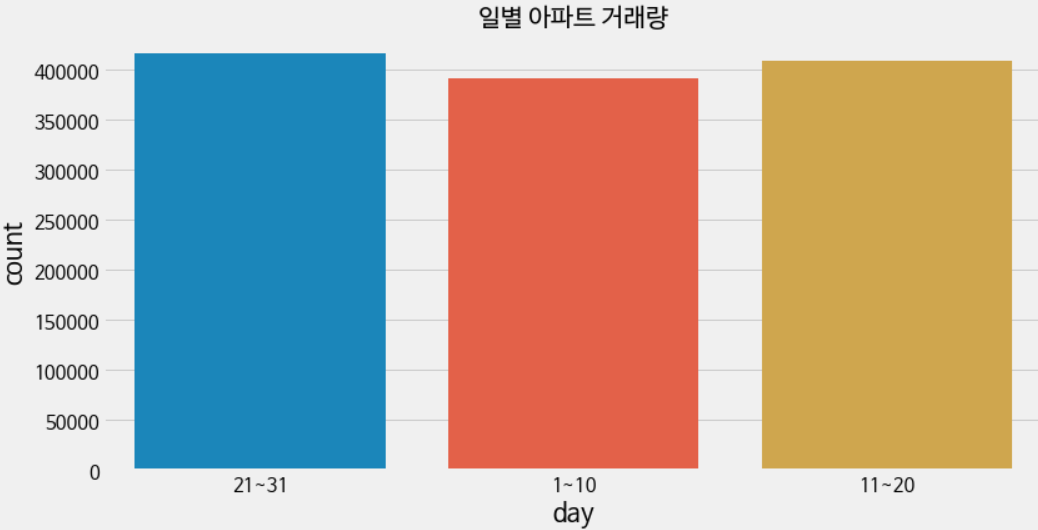

지금까지 연도별, 월별, 일별로 아파트 거래량을 countplot을 통해 확인하였습니다. <br>

이제 어떤 범주형 변수가 나오더라도 막힘 없이 그래프를 그릴 수 있다는 자신감이 생기지 않나요? 💪 <br>




그런데 그래프를 다른 범주에 따라 각각 그릴 수는 없을까요?🤷🤷‍♂️🤷‍♀️<br>


예를 들어 도시에 따른 일별 거래량은 어떻게 그래프를 그리면 좋을까요? 🤔🤔🤔



이렇게 각 범주별로 그래프를 그리고 싶을 때 seaborn은 **<font color=red>hue</font>**라는 키워드를 통해 쉽게 그릴 수 있습니다. <br>




그럼 **<font color=orange>hue = 'transaction_date'</font>**라는 키워드를 통해 도시에 따른 일별 아파트 거래량을 비교해 보겠습니다. <br>

---

#### 이변량 countplot

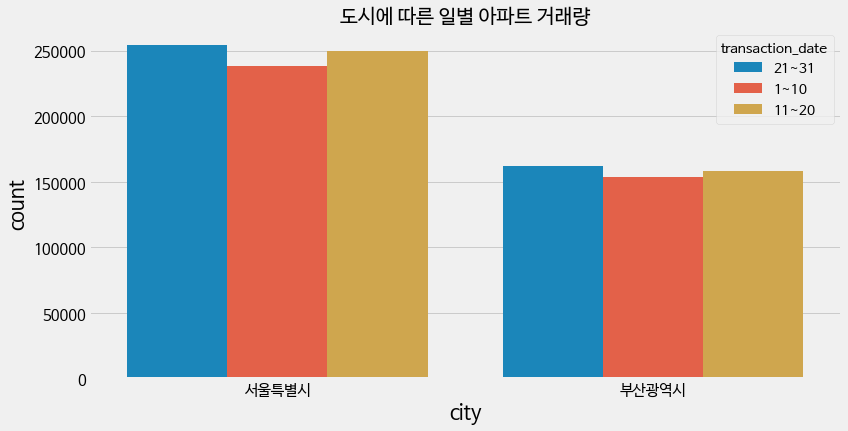

In [ ]:
# seaborn의 countplot을 이용하여 도시에 따른 일별 거래을 나타내봅시다.

plt.figure(figsize=(12, 6))
sns.countplot(x = 'city', hue = 'transaction_date' ,data=train)
plt.title('도시에 따른 일별 아파트 거래량', size = 20)

plt.xticks(size = 15)
plt.yticks(size = 15)

plt.xlabel('city', size = 20)
plt.ylabel('count', size = 20)
plt.show() 

두 도시 모두 월초에 가장 적게 거래가 되었네요!<br>

반면, 월말에 가장 많이 거래가 되었음을 알 수 있습니다.<br>

다음으로 **<font color=orange>hue = 'city'</font>**를 통해 연도에 따른 도시별 아파트 거래량을 비교해보겠습니다.

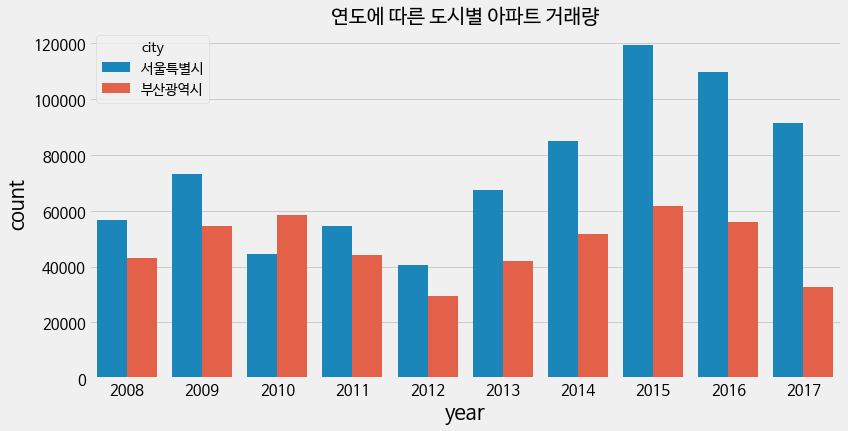

In [ ]:
# seaborn의 countplot을 이용하여 연도에 따른 도시별 아파트 거래량을 나타내봅시다.

plt.figure(figsize=(12, 6))
sns.countplot(x = 'year', hue = 'city' ,data=train)
plt.title('연도에 따른 도시별 아파트 거래량', size = 20)

plt.xticks(size = 15)
plt.yticks(size = 15)

plt.xlabel('year', size = 20)
plt.ylabel('count', size = 20)

plt.show() 

거의 모든 연도에서 서울의 거래량이 높은데 <font color=red>2010년만 부산의 아파트 거래량이 더 높네요!</font>

이제 여러 칼럼에 대해서 한눈에 거래량을 비교할 수 있겠죠?

---

## barplot

countplot은 범주별로 개수를 집계하여 그래프로 표현할 때 사용했습니다.

그렇다면 개수가 아닌 평균, 최댓값 등을 범주별로 집계하여 그래프로 표현할 때에는 어떻게 할까요?




이럴 때는 내가 원하는 범주형 데이터에 대해 값을 집계하는 **<font color=red>pivot table</font>**을 작성한 후, **<font color=red>barplot</font>**을 사용하여 그래프를 그리면 됩니다.

pivot table을 작성하는 방법은 이렇습니다!





* **<font color=orange>pivot_tale()</font>**
* **<font color=orange>데이터 프레임.groupby()</font>**

barplot을 사용하여 그래프를 그리기 위해서



* matplotlib을 사용할 때에는 만들어 놓은 pivot table을 통해, **<font color=orange>plt.bar(x축 값, y축 값)</font>**
* seaborn을 사용할 때에는 **<font color=orange>sns.barplot(x = x축에 사용할 칼럼, y = y축에 사용할 칼럼, data= 사용할 pivot table)</font>**


을 사용합니다.

pivot table과 barplot을 사용해서 <font color=green>도시별로 아파트  평균 거래가 top 10의 지역</font>을 확인해보겠습니다.

---

### 서울특별시 아파트 평균 거래가 top10 지역

먼저 서울특별시의 아파트 평균 거래가 top10 지역을 알아보겠습니다.

이를 위해 서울특별시 데이터만 모아 seoul_data라는 데이터 프레임을 만들겠습니다.

In [ ]:
# 서울특별시 데이터만 모아서 출력해봅시다.
seoul_data = train.loc[train['city']== '서울특별시', :]
seoul_data.head(2)

,transaction_id,apartment_id,city,dong,jibun,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,transaction_real_price,year,month
0,0,7622,서울특별시,신교동,6-13,신현(101동),신교동 6-13 신현(101동),84.82,2002,200801,21~31,2,37500,2008,1
1,1,5399,서울특별시,필운동,142,사직파크맨션,필운동 142 사직파크맨션,99.17,1973,200801,1~10,6,20000,2008,1


(stage1에서 배웠던 loc가 정말 많이 쓰이네요.😘 속닥속닥 )<br>

다음으로 지역별 아파트의 평균 거래가 pivot table을 만들기 위해 `groupby()`를 사용하겠습니다.

groupby의 사용법은 다음과 같습니다.<br>

**<font color=orange>df.groupby(['a'])[['b']].aggregate_function()</font>**


* df : 데이터프레임
* a  : 그룹핑하고 싶은 칼럼
* b  : 집계를 원하는 칼럼 
* aggregate_function() : 집계하고 싶은 함수

In [ ]:
# 서울특별시 지역별로 아파트 평균 거래가 pivot table을 만들어봅시다.
price_seoul_dong = seoul_data.groupby(['dong'])[['transaction_real_price']].mean()
price_seoul_dong_top_10 = price_seoul_dong.sort_values(['transaction_real_price'], ascending = False)[:10]

In [ ]:
price_seoul_dong_top_10

,transaction_real_price
dong,
장충동1가,269888.888889
압구정동,164534.722914
청암동,161403.700000
용산동5가,153497.331633
회현동2가,139906.140351
반포동,132489.395651
한남동,122593.293264
서빙고동,116547.239777
대치동,116320.538909


`seoul_data.groupby(['dong'])[['transaction_real_price']].mean()`<br> 을 통해 서울시 지역별로 아파트 거래가의 평균을 pivot_table로 만들었습니다.<br>



이후 `.sort_values()`를 통해 평균거래가가 높은 순서대로 정렬하였습니다.<br>

마지막으로 `[:10]`을 통해 평균 거래가가 높은 10개의 지역만 선택했습니다.

다음으로 위에서 만든 pivot table에 matplotlib을 사용하여 barplot을 그려보겠습니다.

---

#### 세로 barplot

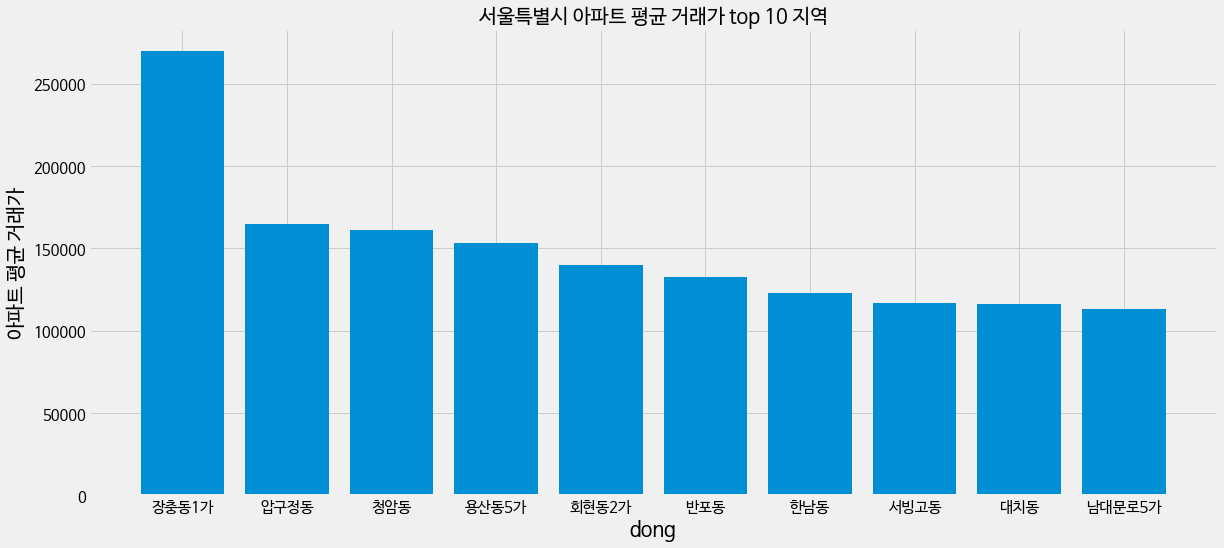

In [ ]:
# matplotlib의 bar을 이용하여 서울특별시 아파트 평균거래가가 높은 10개의 지역을 나타내봅시다.
plt.figure(figsize = (18,8))
plt.bar(price_seoul_dong_top_10.index, price_seoul_dong_top_10['transaction_real_price'])
plt.title('서울특별시 아파트 평균 거래가 top 10 지역', size = 20)

plt.xticks(size = 15)
plt.yticks(size = 15)

plt.xlabel('dong', size = 20)
plt.ylabel('아파트 평균 거래가', size = 20)

plt.show()

서울에서 평균적으로 높은 아파트 가격을 형성하는 지역들이 한눈에 보이네요!

또한, 강남구의 지역이 평균거래가가 가장 높을 것이라 생각했으나 결과를 보니 그렇지 않네요! 



---

다음으로 **<font color=purple>sns.barplot</font>**을 이용하여 동일한 그래프를 seaborn을 사용하여 그려보겠습니다.

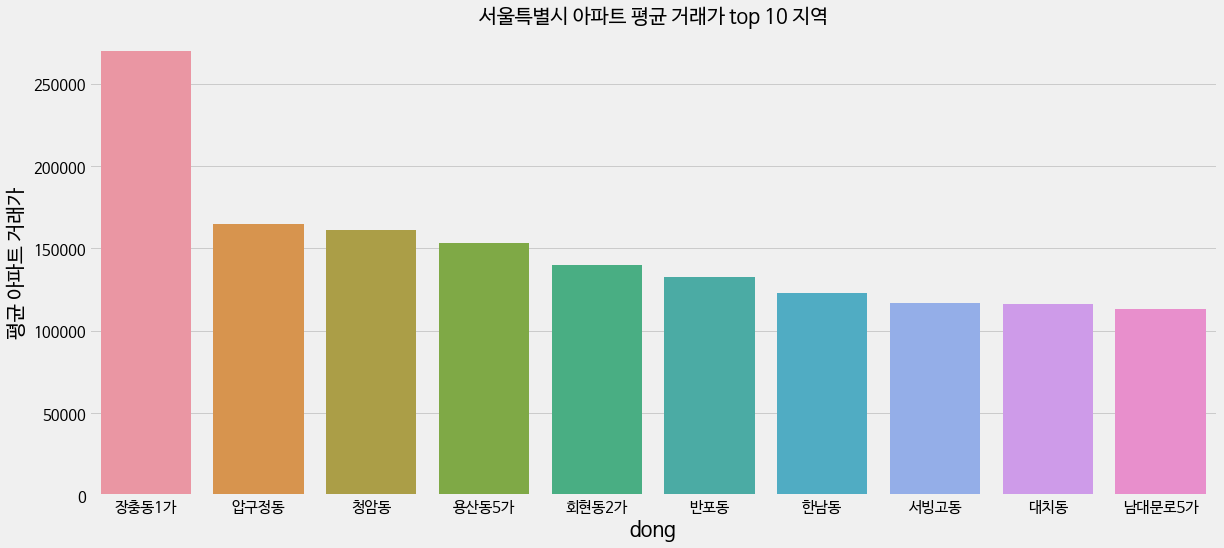

In [ ]:
# seaborn의 barplot을 이용하여 서울특별시 아파트 평균거래가가 높은 10개의 지역을 나타내봅시다.

plt.figure(figsize = (18,8))
sns.barplot(x = price_seoul_dong_top_10.index, y ='transaction_real_price', data = price_seoul_dong_top_10)
plt.title('서울특별시 아파트 평균 거래가 top 10 지역', size = 20)

plt.xticks(size = 15)
plt.yticks(size = 15)

plt.xlabel('dong', size = 20)
plt.ylabel('아파트 평균 거래가', size = 20)

plt.show()

예쁘게 barplot이 그려졌네요!

그래프를 보니 장충동1가의 아파트 평균 가격이 타 서울 지역들에 비해 압도적으로 높음을 알 수 있습니다.

---

### 부산광역시 아파트 평균 거래가 top10 지역

barplot은 막대 그래프를 세로로 그릴 수도 있지만, **<font color=green>가로</font>**로도 그릴 수 있습니다.

사용자가 판단하기에 가로로 그리는게 더 직관적이라고 판단 할 때는 가로로 그리는게 더 낫겠죠?



가로로된 barplot을 그리기 위해서 



* matplotlib을 사용할 때에는 만들어 놓은 pivot table을 통해, **<font color=orange>plt.barh(y축 값, x축 값)</font>**
* seaborn을 사용할 때에는 **<font color=orange>sns.barplot(x = x축에 사용할 칼럼, y = y축에 사용할 칼럼,  orient='h', data= 사용할 pivot table)</font>**

을 사용합니다.

이번에는 부산광역시 <font color=green>아파트의 평균 거래가 top10 지역</font>을 <font color=green>가로</font>로 된 barplot으로 그려보겠습니다.






이를 위해 먼저, 부산광역시 데이터만 모아 busan_data라는 데이터 프레임을 만들겠습니다.

In [ ]:
# 부산광역시 데이터만 모아서 출력해봅시다.
busan_data = train.loc[train['city']== '부산광역시', :]
busan_data.head(2)

,transaction_id,apartment_id,city,dong,jibun,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,transaction_real_price,year,month
650921,650921,3310,부산광역시,영주동,160,동아(160-0),영주동 160 동아(160-0),57.09,1998,200801,1~10,4,7900,2008,1
650922,650922,2939,부산광역시,영주동,587,도경오벨리스,영주동 587 도경오벨리스,84.97,2005,200801,1~10,12,13000,2008,1


다음으로 지역별 아파트의 평균 거래가 pivot table을 만들기 위해 `pivot_table()`을 사용하겠습니다.

`pivot_table()`은 `groupby()`처럼 원하는 범주형 데이터에 대해 값을 집계하는 pivot table을 만들 때 사용합니다.

pivot_table의 사용법은 다음과 같습니다.<br>



**<font color=orange>pd.pivot_table(df, index = ['a'],columns = ['b'], values = ['c'], aggfunc = aggregate_function())</font>**


* df : 데이터프레임
* a  : 그룹핑하고 싶은 칼럼(행에 위치)
* b  : 그룹핑하고 싶은 또 다른 칼럼(열에 위치) 
* aggregate_function() : 집계하고 싶은 함수<br>




이때, 그룹핑하고 싶은 칼럼이 하나인 경우 index 혹은 columns 중 하나를 생략합니다. 

---

In [ ]:
# 부산광역시 지역별로 아파트 평균 거래가 pivot table을 만들어봅시다.
price_busan_dong = pd.pivot_table(busan_data, index=['dong'], values='transaction_real_price', aggfunc=np.mean)
price_busan_dong_top_10 = price_busan_dong.sort_values(['transaction_real_price'], ascending = False)[:10]

In [ ]:
price_busan_dong_top_10

,transaction_real_price
dong,
대교동1가,49786.086957
우동,45634.265235
명륜동,38070.565761
충무동1가,35907.074627
남천동,34514.667134
명지동,33570.809676
민락동,33237.740305
중동,31790.139473
장전동,29908.275735


`pd.pivot_table(busan_data, index=['dong'], values='transaction_real_price', aggfunc=np.mean`<br> 을 통해 부산시 지역별로 아파트 거래가의 평균을 pivot_table로 만들었습니다.<br>



이후 `.sort_values()`를 통해 평균거래가가 높은 순서대로 정렬하였습니다.<br>



마지막으로 `[:10]`을 통해 평균 거래가가 높은 10개의 지역만 선택했습니다.<br>

부산은 대교동 1가의 아파트 평균거래가가 가장 높네요!

다음으로 위에서 만든 pivot table에 matplotlib을 사용하여 가로로 된 barplot을 그려보겠습니다.

---

#### 가로 barplot

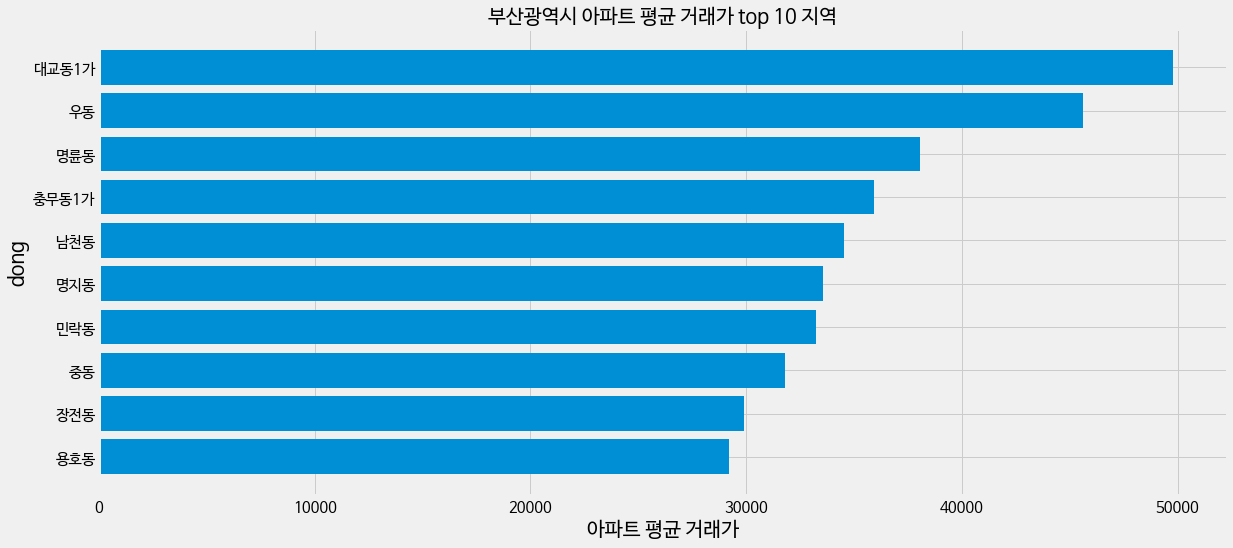

In [ ]:
# matplotlib의 barh을 이용하여 부산광역시 아파트 평균거래가가 높은 10개의 지역을 가로로 나타내봅시다.

plt.figure(figsize = (18,8))
plt.barh(price_busan_dong_top_10['transaction_real_price'].sort_values().index, price_busan_dong_top_10['transaction_real_price'].sort_values())
plt.title('부산광역시 아파트 평균 거래가 top 10 지역', size = 20)

plt.xticks(size = 15)
plt.yticks(size = 15)

plt.xlabel('아파트 평균 거래가', size = 20)
plt.ylabel('dong', size = 20)
plt.show()

부산에서 평균적으로 높은 아파트 가격을 형성하는 지역들의 아파트 평균 거래가가 가로로 깔끔하게 보이네요!

한눈에 크기 비교가 되는 것 같습니다.

다음으로 sns.barplot을 이용하여 동일한 그래프를 seaborn을 사용하여 그려보겠습니다.





---

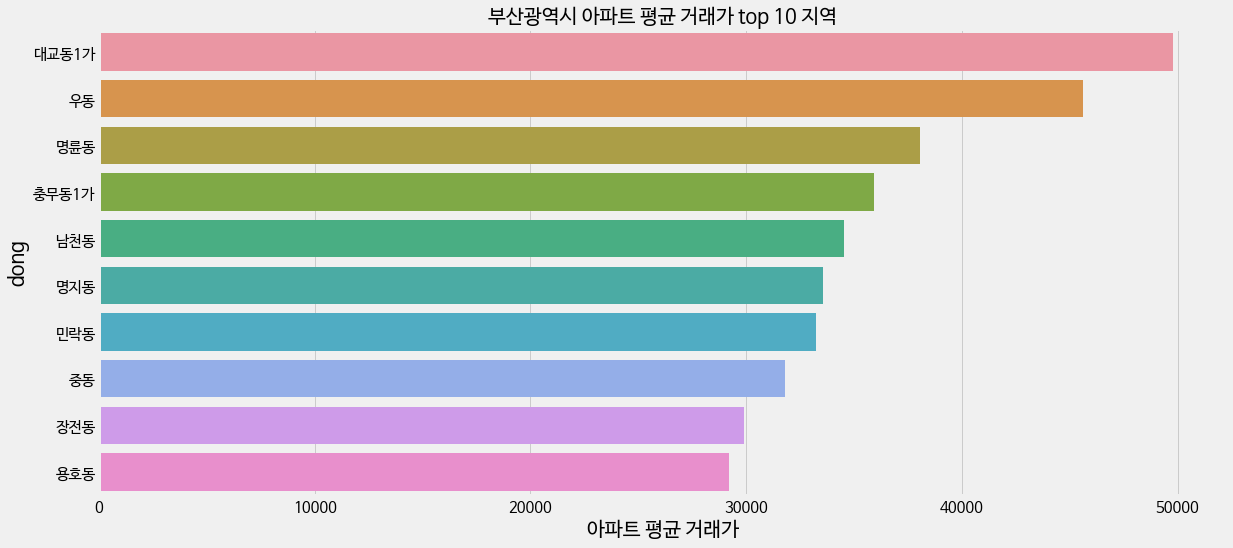

In [ ]:
# seaborn의 barplot을 이용하여 부산광역시 아파트 평균거래가가 높은 10개의 지역을 가로로 나타내봅시다.

plt.figure(figsize = (18,8))
sns.barplot(x ='transaction_real_price', y = price_busan_dong_top_10.index, orient='h', data = price_busan_dong_top_10)
plt.title('부산광역시 아파트 평균 거래가 top 10 지역', size = 20)

plt.xticks(size = 15)
plt.yticks(size = 15)

plt.xlabel('아파트 평균 거래가', size = 20)
plt.ylabel('dong', size = 20)
plt.show()   

어? 근데 이상하지 않나요?🤔



우리 상식에서는 서울에서는 강남구가 높고, 부산에서는 해운대구가 거래가격이 높을거라고 생각했는데

오히려 서울에서는 <font color=blue>중구</font>, 부산에서는  <font color=blue>영도구</font>의 특정 지역이 더 높네요!



중구인 장충동 1가, 영도구인 대교동 1가가 과연 진짜로 평균 거래가격이 높을까요 ?

데이터 개수를 한번 확인해봅시다 🌈

In [ ]:
train.loc[train['dong']=='장충동1가','apt'].unique()

array(['장충동라임카운티', '상지리츠빌장충동카일룸', '장충레지던스'], dtype=object)

In [ ]:
train.loc[train['dong']=='대교동1가','apt'].unique()

array(['원광브릿지타워'], dtype=object)

한 개의 법정동에 해당하는 아파트가 3개 이하로 존재하네요.😨😨😨



평균과 같은 대표값의 일반화 오류라고 볼 수 있겠죠?

이렇게 표본이 적은 데이터를 포함한 데이터 분석은 낮은 신뢰도를 가진답니다.



---



지금까지 범주형 변수의 그래프를 그릴때 사용되는 여러 기법들을 알아 보았습니다.(여기까지 모두 잘 따라오셨죠?!😉)

지금까지 잘 따라오신 분들을 위해 보너스 **<font color=blue>심화 코스</font>**를 준비했습니다(👏👏👏)



matplotlib과 seaborn은 자신이 원하는대로 custom이 가능한데요. 이를 잘 활용하면 보다 직관적인 그래프를 그릴 수 있습니다. 이때 많이 사용하는 대표적인 문법에는 아래의 문법들이 있습니다.




* plt.axhline() : 그래프에 가로줄을 그릴 때 사용
* plt.axvline() : 그래프에 세로줄을 그릴 때 사용
* plt.annotate() : 그래프에 화살표, 주석 등을 달 때 사용
* plt.text() : 그래프에 말문구를 삽입할 때 사용


(이보다 더 다양한 문법들이 존재하지만 모두 알고 있을 수는 없어요😂

따라서 이외에 필요한 것들이 있다면 필요할 때 찾아보는 것을 권장드립니다!👀)

이런 부수적인 요소들을 사용해서 위에서 만든 barplot을 customize해보겠습니다.



```
plt.figure(figsize = (18,8))
sns.barplot(x = price_seoul_dong_top_10.index, y ='transaction_real_price', data = price_seoul_dong_top_10)
plt.title('서울특별시 아파트 평균 거래가 top 10 지역', size = 20)

plt.xticks(size = 15)
plt.yticks(size = 15)

plt.xlabel('dong', size = 20)
plt.ylabel('아파트 평균 거래가', size = 20)

plt.axhline(48573, color = 'red', linestyle=':')
plt.annotate('서울 전지역 아파트 평균 거래가 = 48573(만원)', xy =(3,48573), xytext=(4,70000), arrowprops={'color':'red'}, size = 15)

for i in range(len(price_seoul_dong_top_10)):
  plt.text(x = range(len(price_seoul_dong_top_10))[i]-0.4, y = price_seoul_dong_top_10['transaction_real_price'][i]+2500, s =str(round<br>(price_seoul_dong_top_10['transaction_real_price'][i])) + '(만원)', size =15 )
plt.show()
```



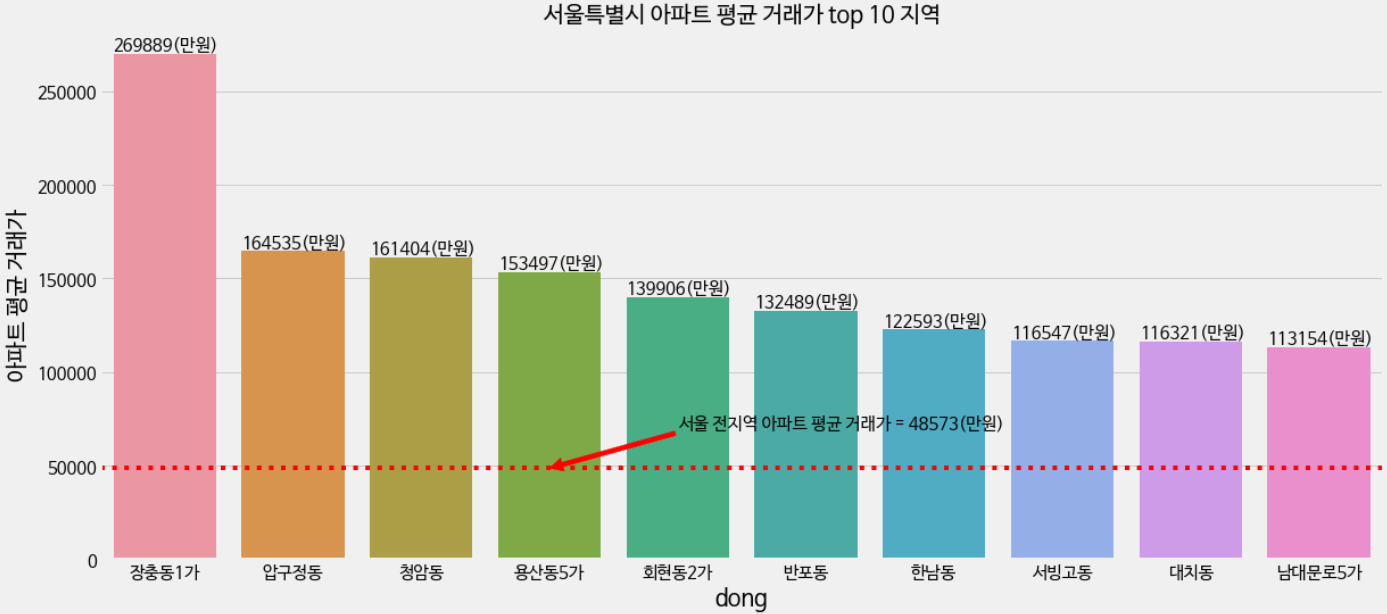

우와! 우리가 원하는 것이 한눈에 보이지 않나요? 여러분들도 보다 직관적이고 친절한 그래프를 그리기 위해서 그래프 customize에 도전해보세요!💪

다음으로 연속형 변수에는 어떤 그래프들을 사용할 수 있는지 다 같이 알아봐요! :)



---



## 히스토그램

### 일변량 히스토그램

우리가 최종적으로 예측해야 하는 변수는 바로 transaction_real_price(아파트 실거래가)인데요! <br>
그렇기 때문에 실거래가의 분포를 살펴보는 과정이 꼭 필요하답니다 😊


실거래가와 같은 연속형 변수의 데이터 분포를 파악할 때는 주로 **<font color=red>히스토그램</font>**이라는 그래프를 사용해요. <br>
히스토그램을 그리기 위해서는 다음과 같은 두 가지 방법을 사용합니다.



- matplotlib 활용: **<font color=orange>plt.hist(사용할 데이터, bins = ㅁ)</font>**
- seaborn 활용: **<font color=orange>sns.barplot(x = x축에 사용할 칼럼, data= 사용할 데이터, bins = ㅁ)</font>**

잠깐! 여기서 <font color=blue>**bins**</font>가 뭔지 궁금하시다구요? 😮 <br>


matplotlib과 seaborn에서 공통적으로 사용되는 bins라는 인수는 데이터를 집계할 구간 정보를 반영합니다. <br>
좀 더 쉽게 말하자면, <font color=purple>**그래프의 가로축 구간의 개수를 지정해주는 인수**</font>인데요.

아래 그림과 같이 구간의 개수에 따라 히스토그램 분포의 형태가 달라질 수 있기 때문에 <br>
적절한 구간의 개수를 지정해줘야 합니다! 😄

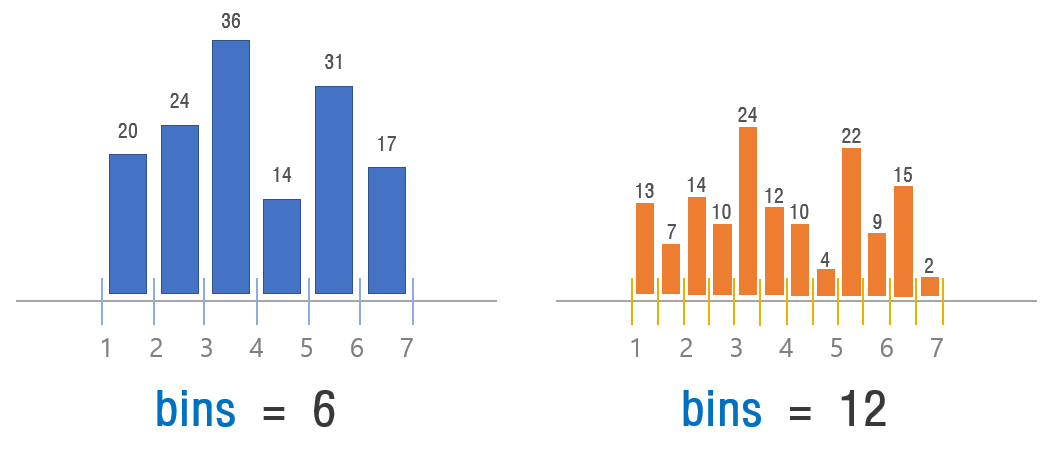



---



그럼, 직접 그래프를 그려볼까요? 😎😎 <br>
먼저 <font color=red>**matplotlib**</font>을 사용하여 아파트 실거래가의 데이터 분포를 확인해보겠습니다!

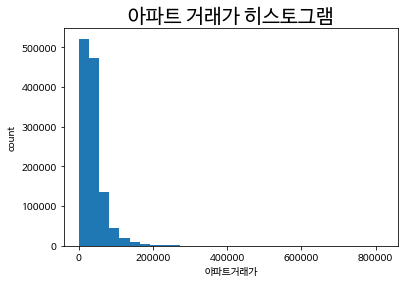

In [ ]:
# matplotlib으로 히스토그램을 그려봅시다.

plt.hist(train['transaction_real_price'], bins = 30)
plt.title('아파트 거래가 히스토그램', size = 20)

plt.xlabel('아파트거래가')
plt.ylabel('count')
plt.show()

아파트 실거래가의 분포가 왼쪽으로 치우쳐 있네요!


---

다음으로 <font color=red>**seaborn**</font>을 사용하여 동일한 그래프를 그려보겠습니다. <br>



잠깐만요, 여기서 꿀팁 하나 알려드릴게요 😎 <br>
seaborn으로 히스토그램을 그릴 때에는 인수로 **<font color=green>kde=True</font>**를 사용하면 해당 그래프를 곡선으로 추정하여 그려줍니다. <br>


이 인수를 사용하면 더 용이하게 데이터의 분포를 파악할 수 있겠죠? 😊

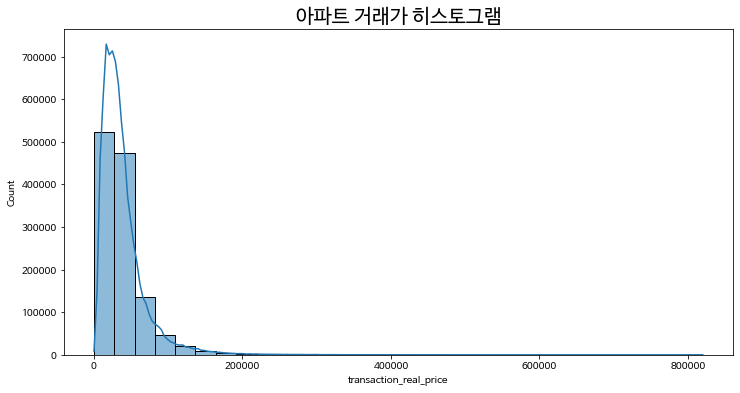

In [ ]:
# seaborn으로 히스토그램을 그려봅시다.

plt.figure(figsize=(12, 6))
sns.histplot(x='transaction_real_price', data=train, kde=True, bins=30)
plt.title('아파트 거래가 히스토그램', size = 20)

plt.show()



---



### 이변량 히스토그램

이제 **<font color=red>seaborn</font>**의 histplot을 사용해볼 차례인데요! <br> 


**<font color=orange>hue = 'city'</font>**라는 키워드를 통해, 도시별로 아파트 실거래가의 데이터 분포를 확인해보겠습니다. <br>

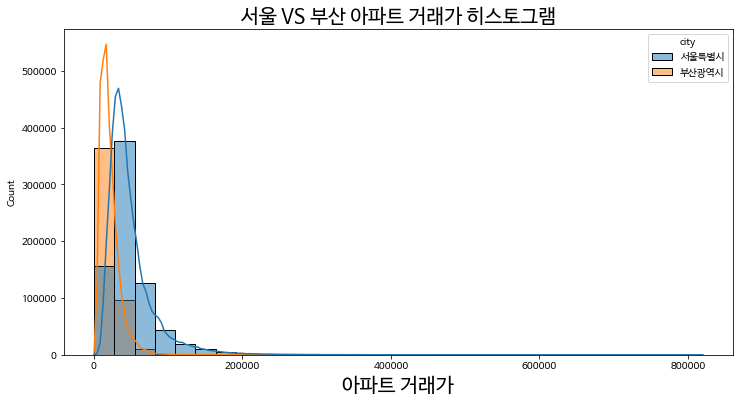

In [ ]:
# matplotlib으로 히스토그램을 그려봅시다.
plt.figure(figsize=(12, 6))
sns.histplot(x='transaction_real_price', data=train, kde=True, hue = 'city', bins=30)
plt.title('서울 VS 부산 아파트 거래가 히스토그램', size = 20)
plt.xlabel('아파트 거래가', size = 20)
plt.show()

위에서 봤던 것처럼 대체적으로 부산보다 서울의 아파트 실거래가가 더 높음을 확인할 수 있어요. <br>
게다가 두 도시의 실거래가 분포가 모두 왼쪽으로 치우쳐 있네요! <br>



그 이유를 추측해보자면 서울과 부산 모두 유난히 실거래가가 높은 아파트들이 꽤 존재하기 때문일 거예요. <br>
그럼 데이터의 치우침을 줄이려면 어떻게 해야 할까요? 😮

일반적으로 <font color=blue>값에 로그를 취해 큰 수를 작게 만드는 방법</font>을 사용해요. <br>
이 방법을 우리는 **<font color=blue>로그변환</font>**이라고 부르는데, 이렇게 하면 더 의미 있는 분석 결과를 도출하게 될 수도 있어요. 

제 말이 사실인지 궁금하시다구요? <br>


그럼 저와 함께 numpy 패키지의 **<font color=orange>np.log1p()</font>** 함수를 사용해서 로그변환을 적용해볼게요 😁😁<br>
참고로 여기서 np.log()가아닌 np.log1p()를 사용하는 이유는 아파트 실거래가 값이 0인 데이터가 존재할 수도 있기 때문이에요.

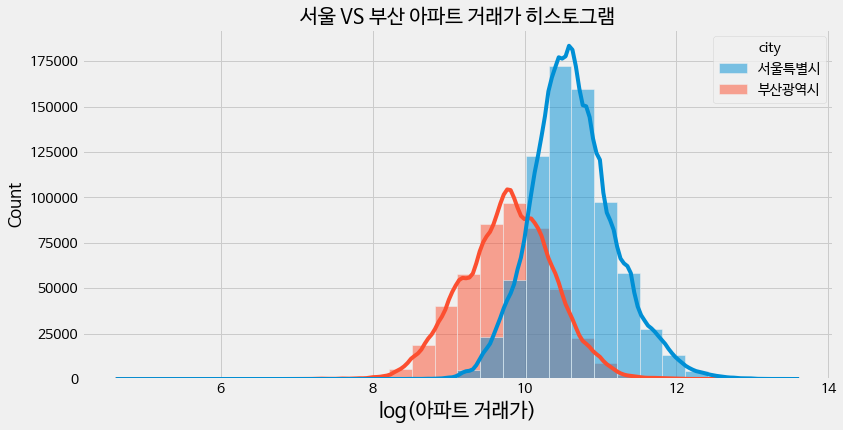

In [ ]:
# 보다 명확한 차이를 확인하기 위해 로그를 취해서 비교해봅시다.

plt.figure(figsize=(12, 6))
sns.histplot(x= np.log1p(train['transaction_real_price']), data=train, kde=True, hue = 'city',bins=30)
plt.title('서울 VS 부산 아파트 거래가 히스토그램', size = 20)

plt.xlabel('log(아파트 거래가)', size = 20)
plt.show()

와우! 로그값을 취하고 나니 두 데이터 모두 <font color=purple>중앙</font>에 밀집되었네요. 신기하지 않나요? 😄 <br>


그렇지만 <font color=red>전체적으로 부산보다 서울의 아파트 실거래가가 더 높다</font>는 사실은 변함이 없네요!



---



## boxplot

우리는 히스토그램을 통해 서울, 부산의 아파트 실거래가의 분포가 왼쪽으로 치우쳐져 있음을 확인했어요. <br>
이는 유난히 실거래가가 높은 아파트들, 즉 이상치가 많이 존재하기 때문인데요.



그렇다면 **연속형 변수에 이상치가 얼마나 많이 포함되어 있는지** 알고 싶을 땐 어떻게 해야 할까요? 😮 <br>
이럴 때 **<font color=red>박스 플롯(box plot)</font>** 을 활용할 수 있어요.

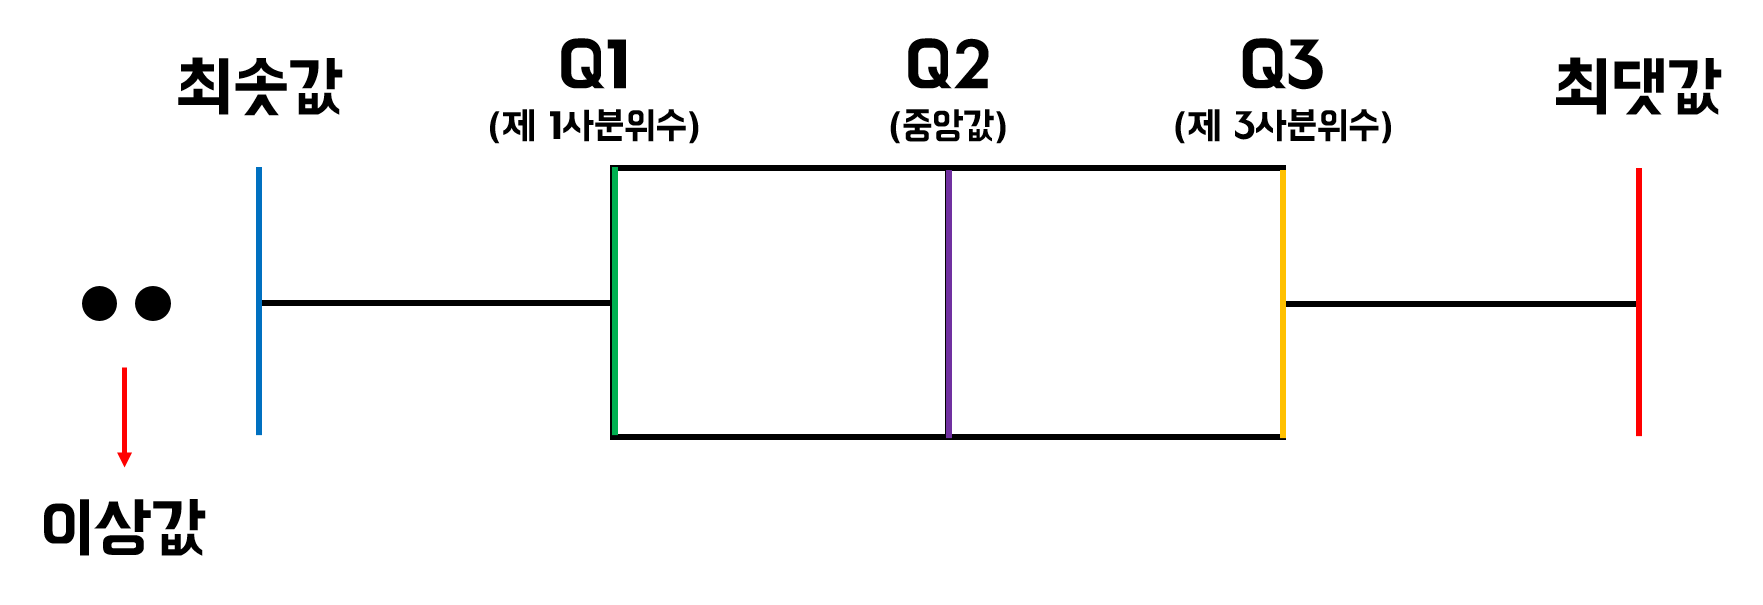

**<font color=red>box plot</font>**은 개별적인 이상치들과 데이터의 대략적인 분포를 동시에 보여주는 그래프입니다! <br>
서로 다른 데이터 뭉치를 쉽게 비교할 수 있도록 도와주기 때문에 널리 쓰이는 시각화 방법이에요 😊
<br><br>
box plot은 아래와 같이 크게 4가지 정보를 가지고 있어요!

`① 최솟값
② 제1사분위수, 제2사분위수(=중앙값), 제3사분위수
③ 최댓값
④ 이상값(이상치)`

이걸 그리기 위해서는 다음과 같은 두 가지 방법을 사용할 수 있어요.

① matplotlib 활용: **<font color=orange>plt.boxplot(사용할 데이터)</font>**

② seaborn 활용: **<font color=orange>sns.boxplot(y = y축에 사용할 칼럼, data= 사용할 데이터)</font>**



여기서 꿀팁 하나 드릴게요 🥰

boxplot을 가로로 그리고 싶을 땐 다음의 방법을 활용하세요! 😊



* matplotlib 활용: `vert=False`라는 키워드 기입 <br>
* seaborn 활용: 컬럼에 y대신 x를 사용

그럼 먼저, **<font color=red>matplotlib</font>**을 사용하여 아파트 실거래가의 이상치와 데이터의 요약정보를 확인해보겠습니다!



---



### 일변량 boxplot

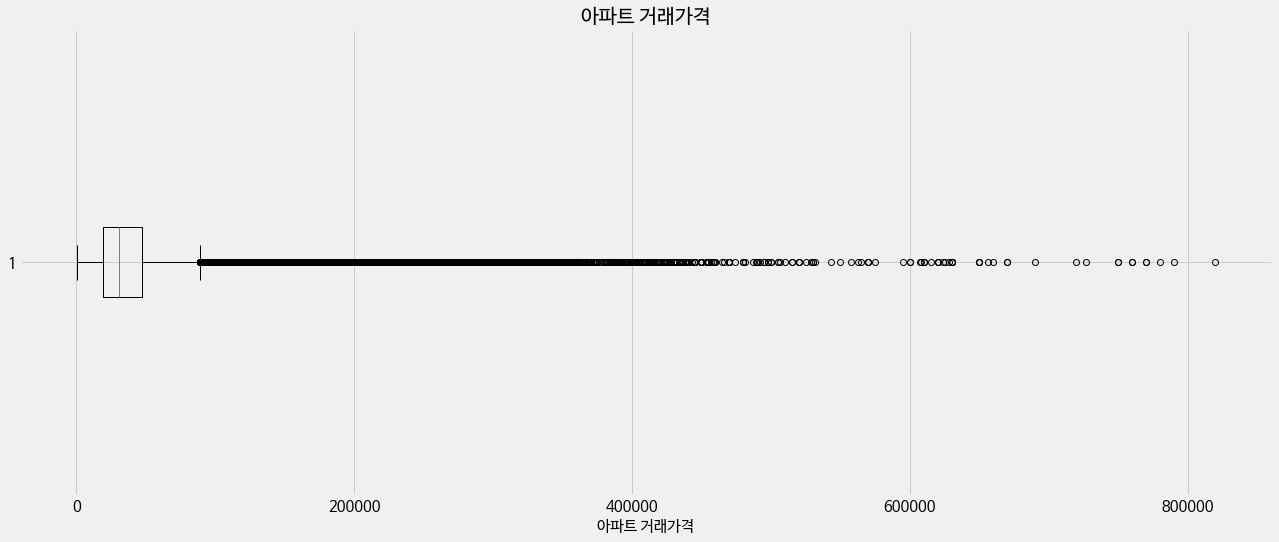

In [ ]:
# plt의 boxplot을 통해 아파트 거래가의 이상치를 확인해봅시다.
plt.figure(figsize = (20,8))
plt.boxplot( train['transaction_real_price'], vert=False)
plt.title('아파트 거래가격', size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel('아파트 거래가격', size = 15)
plt.show()

위에서 보이는 것처럼 이상치가 매우 많이 존재함을 알 수 있어요. <br>
또한 이상치들의 값이 일반적인 데이터보다 매우 크네요 😕






---

다음으로 **<font color=blue>seaborn</font>**을 사용하여 동일한 그래프를 그려보겠습니다.

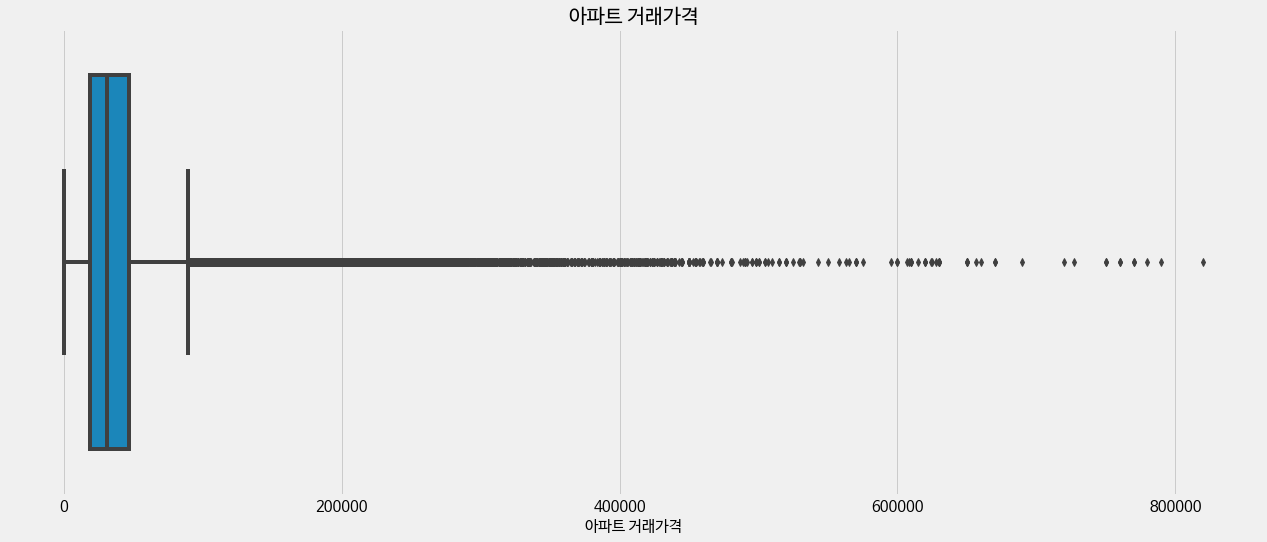

In [ ]:
# seaborn의 boxplot을 통해 아파트 거래가의 이상치를 확인해봅시다.
plt.figure(figsize = (20,8))
sns.boxplot(x = 'transaction_real_price', data = train)
plt.title('아파트 거래가격', size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel('아파트 거래가격', size = 15)
plt.show()

이번에는 도시별로 실거래가의 이상치와 데이터의 요약정보를 확인해볼까요? <br>

이를 위해 seaborn의 **<font color=blue>boxplot</font>**을 활용해봅시다! <br>
x축에는 도시(city), y축에는 실거래가(transaction_real_price) 컬럼을 기입하겠습니다.



---



### 이변량 boxplot

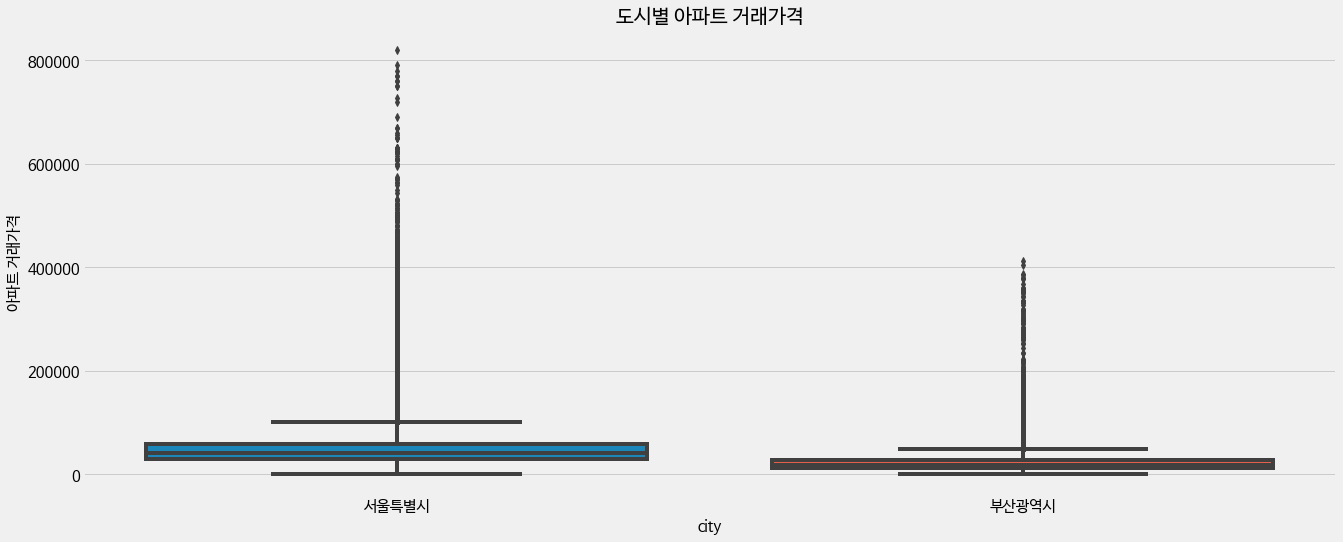

In [ ]:
# seaborn의 boxplot을 통해 도시별 거래가를 확인해봅시다.

plt.figure(figsize = (20,8))
sns.boxplot(x = 'city', y = 'transaction_real_price', data = train)
plt.title('도시별 아파트 거래가격', size = 20)

plt.xticks(size = 15)
plt.yticks(size = 15)

plt.xlabel('city', size = 15)
plt.ylabel('아파트 거래가격', size = 15)
plt.show()

아파트 실거래가의 이상치 또한 부산보다 서울이 훨씬 높게 형성되어 있네요 😮😮



---



## 상관계수


이제 변수들의 관계를 파악해볼까요? 😊 <br>
이 과정이 필요한 이유는 변수들 사이에 상관관계를 발견하면 좋은 인사이트를 얻을 수 있기 때문인데요!



관계를 파악할 때 확인하는 값은 바로 **<font color=red>상관계수</font>**입니다. <br>
이는 변수들 사이의 특정한 상관관계의 정도를 수치적으로 나타낸 계수인데요 😀



상관계수의 종류에는 여러가지가 있지만 일반적으로 **<font color=blue>피어슨 상관계수</font>**를 자주 사용해요! <br>
피어슨 상관계수란 두 연속형 변수의 선형적 상관 관계를 계량화한 수치로서 **<font color=blue>-1에서 1 사이</font>**의 값을 가지며, 자세한 해석은 다음과 같습니다.

* +1 : 완벽한 양의 선형 상관 관계 
* -1 : 완벽한 음의 선형 상관 관계
* ±0.9 이상(이하) : 매우 높은 양의(음의) 선형 상관 관계
* ±0.9 ~ ±0.7 : 높은 양의(음의) 선형 상관 관계
* ±0.7 ~ ±0.4 : 다소 높은 양의(음의) 선형 상관 관계
* ±0.4 ~ ±0.2 : 낮은 양의(음의) 선형 상관 관계
* ±0.2 미만 : 선형 상관 관계가 거의 없음
* 0 : 선형 상관 관계 없음 

**<font color=orange>데이터 프레임.corr()</font>**을 사용하면 각 변수들 사이의 상관계수 값을 테이블 형태로 출력해줍니다.

In [ ]:
# 상관계수 값을 cor이라는 객체에 할당해봅시다.
cor = train.corr()
cor

흠.... 🤔 그런데 변수가 많아서 그런지 상관계수 값들을 한눈에 파악하기 어렵네요. 이럴 땐 어떻게 해야 할까요? 😮😮

seaborn의 **<font color=red>heatmap</font>**을 사용하면 상관계수 테이블을 시각적으로 볼 수 있어, 변수들 간 선형 상관관계를 쉽게 파악할 수 있어요!



다음과 같은 기본 문법과 옵션을 활용해서 상관계수를 구하고 색깔도 이쁘게 입혀볼까요? <br>




기본 문법 : **<font color=orange>sns.heatmap(색을 입힐 데이터, cmap = 색깔)</font>**

* `annot=True` : heatmap 안에 상관계수 값을 표시함
* `fmt=".3f"` : 소숫점 3번째 자리까지 표현함
* `cbar=False` : colorbar를 보이지 않게 함
* `linewidths=0.5` : 칸마다 라인의 두께를 0.5로 설정함

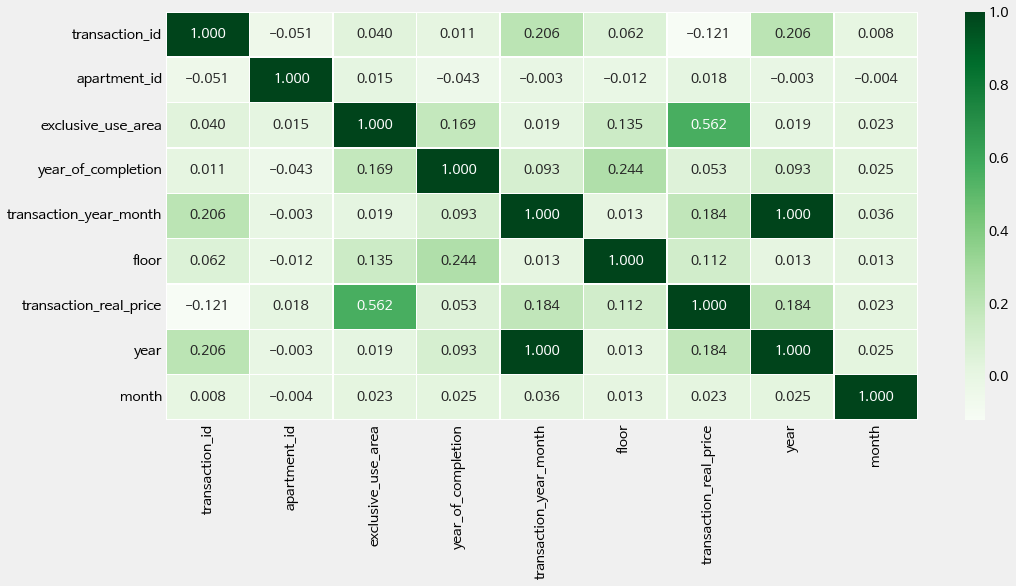

In [ ]:
# heatmap을 사용해 상관관계 테이블을 한눈에 보기 쉬운 형태로 만들어봅시다.
plt.figure(figsize=(15, 7))
sns.heatmap(cor, cmap="Greens", annot=True, linewidths=0.5, fmt=".3f", cbar = True)
plt.show()

네모 칸이 <font color=green>진한 초록색</font>일수록 상관계수 값이 크다는 걸 알 수 있습니다. <br>



아, 그런데 잠시만요! <br>


자기 자신과의 상관계수 값은 항상 1이라는 점 기억해주세요 😊 <br>
따라서 모든 대각 성분이 가장 진한 초록색이 되는 거랍니다. <br>



우리는 위 heatmap을 통해 <font color=purple>전용면적과 아파트 실거래가 사이에 어느정도 양의 상관관계가 존재함</font>을 알게 되었습니다. <br>
즉, 전용면적이 클수록 실거래가가 높게 형성되는 경향성이 어느정도 보인다는 의미에요. 



---



## scatter plot & lmplot

이번에는 위에서 보았던 **<font color=blue>연속형 변수들 사이의 상관관계의 정도</font>**를 시각적으로 나타내고 싶습니다.

도대체 어떻게 해야할까요? 🤔🤔🤔

이럴때 **<font color=red>scatter plot</font>** 이나 **<font color=red>lmplot</font>**를 사용하면 유용해요! 

먼저, **<font color=red>scatter plot</font>**은 두 연속형 변수로 형성된 값을 **<font color=purple>점</font>**의 형태로 보여줘요, 이러한 점들이 우상향하는 흐름을 보인다든지, 우하향하는 흐름을 보인다든지, 특정한 경향을 보이지 않는다든지! 

- 이런 정보를 통해서 **<font color=green>상관관계</font>**를 어느정도 파악할 수 있답니다.
- 특정 부분에서 주변의 점들과 동떨어진 점이 혼자 존재한다면 데이터가 **<font color=green>이상한 부분(이상치)</font>**을 파악할 수 있어요.
- 데이터 분포를 보고 특정 **<font color=green>군집</font>**별로 나눠서 생각해볼 수도 있겠죠?

그런데, 설명만 보고는 어떤 경우에 사용해야 하는지 잘 모르겠다고요?🤷‍♂️

그럼, 같이 plot를 그리는 방법을 알아보면서 사례를 통해서 이해해봅시다!

scatter plot을 그리기 위해서 아래와 같이 해볼까요?

* matplotlib을 사용할 때에는 **<font color=orange>plt.scatter(x = x축에 사용할 데이터, y = y축에 사용할 데이터)</font>**
* seaborn을 사용할 때에는 **<font color=orange>sns.scatterplot(x = x축에 사용할 칼럼, y= y축에 사용할 칼럼, data= 사용할 데이터)</font>**

우리는 'exclusive_use_area'와 'transaction_real_price'를 가지고 <font color=green>전용면적과 아파트 실거래가의 관계</font>를 시각화해볼까요?

어렵게 생각할 것 없어요!!!🙅‍♂️ 가이드에 따라서 아래와 같이 입력만 해도 plot이 나온답니다.

**plt.scatter(x = train['exclusive_use_area'], y = train['transaction_real_price'])**


**sns.scatterplot(x='exclusive_use_area', y='transaction_real_price', data= train)**



---



### 일변량 scatter plot

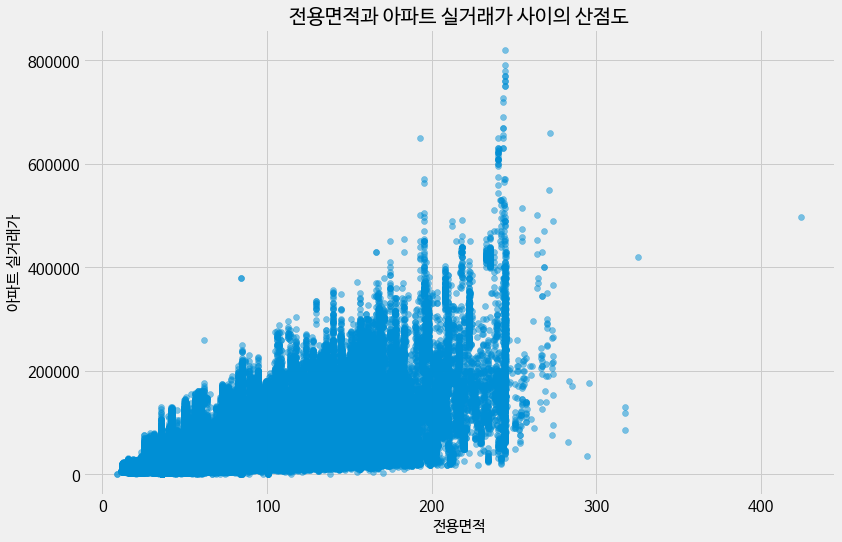

In [ ]:
# matplotlib를 이용해서 전용면적과 아파트 실거래가의 산점도를 나타내봅시다.

plt.figure(figsize=(12, 8))
plt.scatter(x = train['exclusive_use_area'], y = train['transaction_real_price'],  alpha=0.5)
plt.title('전용면적과 아파트 실거래가 사이의 산점도', size = 20)

plt.xticks(size = 15)
plt.yticks(size = 15)

plt.xlabel('전용면적', size = 15)
plt.ylabel('아파트 실거래가', size = 15)
plt.show()

전용면적이 커질수록 아파트 실거래가가 어떻게 분포하나요? **<font color=blue>우상향</font>** 하는 것으로 보이기도 하네요!






---

다음으로, 같은 상황에 대해서 **<font color=red>seaborn</font>**을 통해서도 그려봅시다!

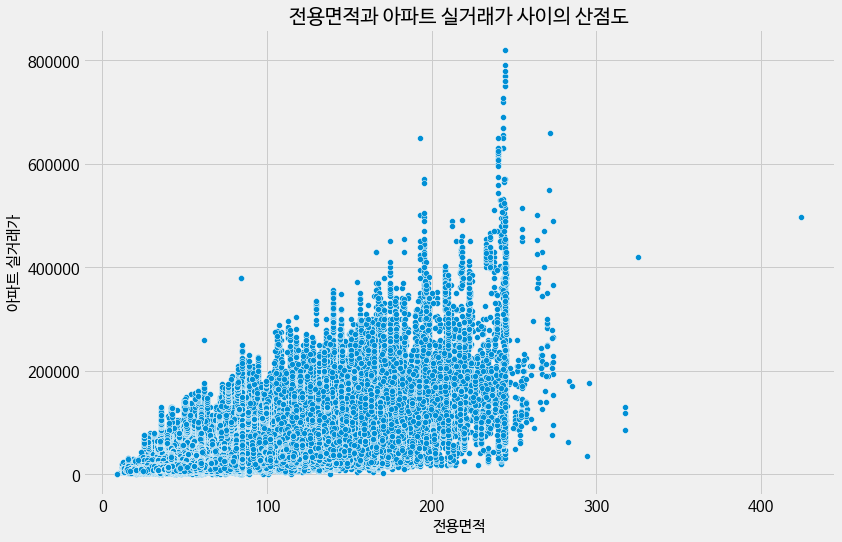

In [ ]:
# seaborn를 이용해서 전용면적과 아파트 실거래가의 산점도를 나타내봅시다.

plt.figure(figsize=(12, 8))
sns.scatterplot(x='exclusive_use_area', y='transaction_real_price', data= train)
plt.title('전용면적과 아파트 실거래가 사이의 산점도', size = 20)

plt.xticks(size = 15)
plt.yticks(size = 15)

plt.xlabel('전용면적', size = 15)
plt.ylabel('아파트 실거래가', size = 15)
plt.show()

matplotlib과 동일한 그래프가 그려진게 보이시나요?

흠... scatter plot을 통해서 상관관계를 파악할 수 있다고 했는데요, 점의 분포하고 데이터의 추세를 바로바로 확인하고 싶을 때!

바로 **<font color=red>lmplot</font>**를 쓰는 겁니다. lmplot은 scatter plot에서 **<font color=blue>추세선</font>**만 추가한 것이라고 생각하면 된답니다.

- seaborn에서 lmplot를 사용할 때에는 **<font color=orange>sns.lmplot(x = x축에 사용할 칼럼, y= y축에 사용할 칼럼, data= 사용할 데이터)</font>**

그럼, 같은 상황에 lmplot를 적용해볼까요?

<Figure size 864x576 with 0 Axes>

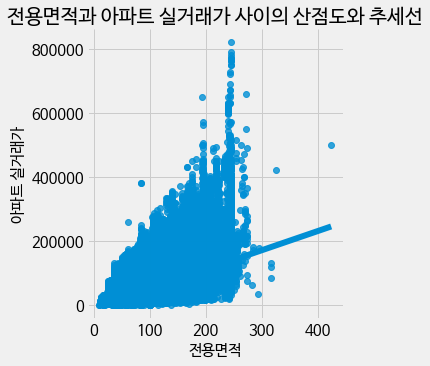

In [ ]:
# seaborn의 lmplot를 이용해서 전용면적과 아파트 실거래가의 산점도와 추세선을 나타내봅시다.

plt.figure(figsize=(12, 8))
sns.lmplot(x='exclusive_use_area', y='transaction_real_price',data= train)
plt.title('전용면적과 아파트 실거래가 사이의 산점도와 추세선', size = 20)

plt.xticks(size = 15)
plt.yticks(size = 15)

plt.xlabel('전용면적', size = 15)
plt.ylabel('아파트 실거래가', size = 15)
plt.show()

양의 기울기를 가진 추세선이 산점도와 같이 그려진 것이 보이시나요?

전용면적이 증가할수록 아파트 실거래가는 증가하는 추세를 보이는군요😁




---



### 이변량 scatter plot

이제는 한단계 더 나아가서! 변수를 하나 추가해볼게요. 





좀 전까지 많은 plot를 배울 때와 마찬가지로 seaborn의 **<font color=red>hue</font>**를 이용해서 도시 변수를 추가해봅시다!



seaborn의 scatterplot으로 <font color=purple>서울특별시와 부산광역시의 전용면적과 아파트 실거래가의 관계</font>를 동시에 시각화하려면 어떻게 해야할까요?



위에서 했던 코드를 그대로 가져와서 한번 시도해봅시다!



---



#### 퀴즈

In [ ]:
# seaborn를 이용해서 도시별 전용면적과 아파트 실거래가의 산점도를 나타내봅시다.

plt.figure(figsize=(12, 8))
sns.scatterplot(x='exclusive_use_area', y='transaction_real_price', data= train) ### 이 부분 수정이 필요해요!
plt.title('도시에 따른 전용면적과 아파트 실거래가 사이의 산점도', size = 20)

plt.xticks(size = 15)
plt.yticks(size = 15)

plt.xlabel('전용면적', size = 15)
plt.ylabel('아파트 실거래가', size = 15)
plt.show()



---



##### 설명



sns.scatterplot에서  `hue = 'city'`라는 키워드를 통해 도시별로 두 칼럼사이의 관계가 어떤지 확인해보세요!

##### 풀이 - 힌트

hue를 사용했던 구간에 다시 한번 갔다올까요???

`sns.countplot(x = 'city', hue = 'transaction_date' ,data=train)`를 사용해서 도시별 일별 거래량을 시각화 해봤었어요!

##### 풀이 - 정답

```
# seaborn를 이용해서 도시별 전용면적과 아파트 실거래가의 산점도를 나타내봅시다.

plt.figure(figsize=(12, 8))
sns.scatterplot(x='exclusive_use_area', y='transaction_real_price', hue = 'city' ,data= train)
plt.title('도시에 따른 전용면적과 아파트 실거래가 사이의 산점도', size = 20)

plt.xticks(size = 15)
plt.yticks(size = 15)

plt.xlabel('전용면적', size = 15)
plt.ylabel('아파트 실거래가', size = 15)
plt.show()
```

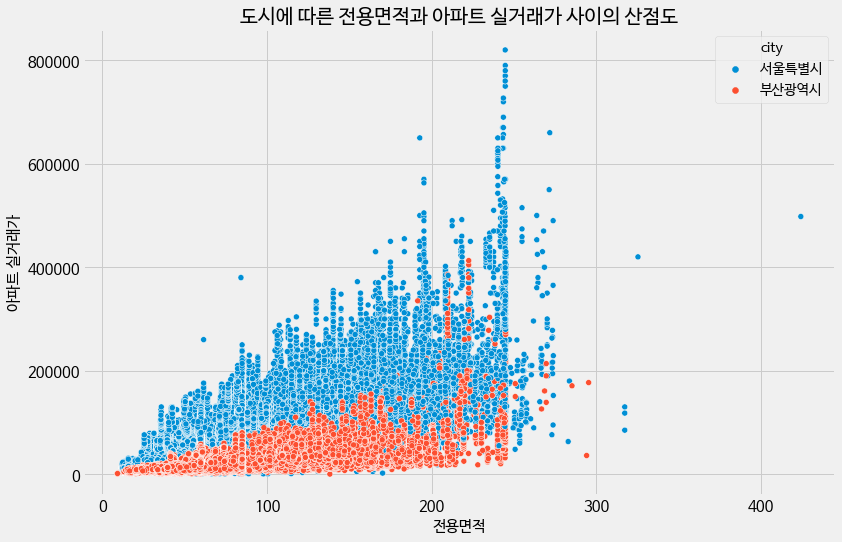



---



### lmplot

도시별로 전용면적에 대한 아파트 실거래가 분포가 어떤가요 차이가 존재하는 것처럼 보이시나요??



더 자세한 추세를 비교하기 위해서 같은 방식으로  **<font color=red>도시별 lmplot</font>**도 그려봅시다!

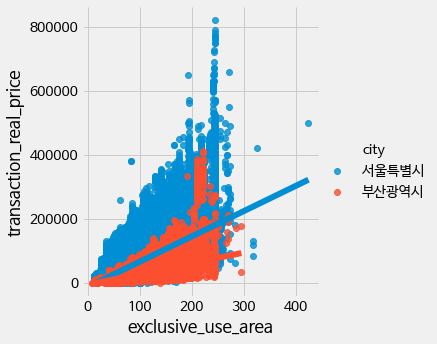

In [ ]:
sns.lmplot(x='exclusive_use_area', y='transaction_real_price', hue='city' ,data= train)
plt.show()

lmplot를 보니 부산보다는 <font color=red>서울</font>에서 전용면적이 클수록 아파트 실거래가가 증가하는 추세가 더 <font color=red>강한</font> 것으로 보이네요.



---



## line plot

지금까지 잘 따라오고 계신가요?? 드디어 마지막입니다...😨😨😨


**<font color=blue>시간</font>**에 따라 데이터가 어떤 모양을 가지는지 관찰할 때! 사용하는 것이 바로 **<font color=red>lineplot</font>** 입니다!

역시, 설명보다는 실전이죠😁

lineplot을 그리기 위해서 아래와 간단히 시각화할 수 있어요!


* matplotlib을 사용할 때에는 **<font color=orange>plt.plot(시간과 관련된 데이터, 시간에 따른 추이를 보고 싶은 데이터)</font>**
* seaborn을 사용할 때에는 **<font color=orange>sns.lineplot(x = 시관과 관련된 칼럼, y= 시간에 따른 추이를 보고 싶은 칼럼, data= 사용할 데이터)</font>**


마지막 사례로 **<font color=green>거래연도</font>**별로 **<font color=green>아파트 실거래가</font>**가 어떻게 다른지 시각화해서 같이 확인해봐요!







앗, 그런데 그전에!

heatmap과 scatterplot, lmplot를 통해서 전용면적과 아파트 실거래가가 양의 상관관계를 가지는 것을 확인하지 않았나요?



그렇다면, **<font color=green>전용면적당 아파트 실거래가</font>**를 새로운 변수로 만들어서 거래연도별로 시각화하는 것이 더 명확하겠네요!



먼저 '**<font color=green>price_per_area</font>**'이름으로 전용면적당 아파트 실거래가 변수를 생성해줍시다.

In [ ]:
# 전용면적당 아파트 거래가 변수를 만들어봅시다.
train['price_per_area'] = train['transaction_real_price'] /  train['exclusive_use_area']

다음으로는 시간에 따른 추이를 보고 싶은 데이터를 만들어줘야겠죠?



여러분들이 2016년과 2017년의 데이터를 비교한다고 해봅시다. 

어떤 값을 대표로 설정해서 평가하나요??




음...우리는 연도별로 전용면적당 아파트 거래가의 **<font color=green>평균</font>**을 계산해서 비교해볼까요?

---

#### 퀴즈

#####  설명


'price_per_area_by_year'라는 이름으로 연도별로 전용면적당 아파트 실거래가 평균을 담은 데이터프레임을 만들어봐요!

전에 배운 groupby()를 사용해봅시다.

##### 풀이 - 힌트

dataframe.gropby([column])[[column]].mean()

##### 풀이 - 정답

```
price_per_area_by_year = train.groupby(['year'])[['price_per_area']].mean()
price_per_area_by_year
```

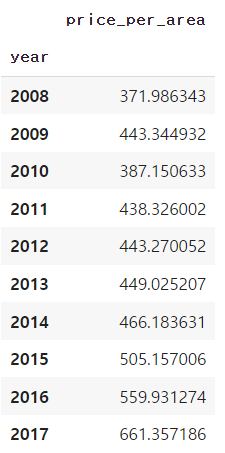



---



### 일변량 line plot

`train.groupby(['year'])['price_per_area'].mean()`을 통해 연도별 전용면적당 평균 아파트 거래가를 데이터프레임으로 잘 만들었나요?

matplotlib의 lineplot를 이용해서 <font color=green>시간에 따른 전용면적당 평균 아파트 거래가</font>의 추이를 살펴봅시다!

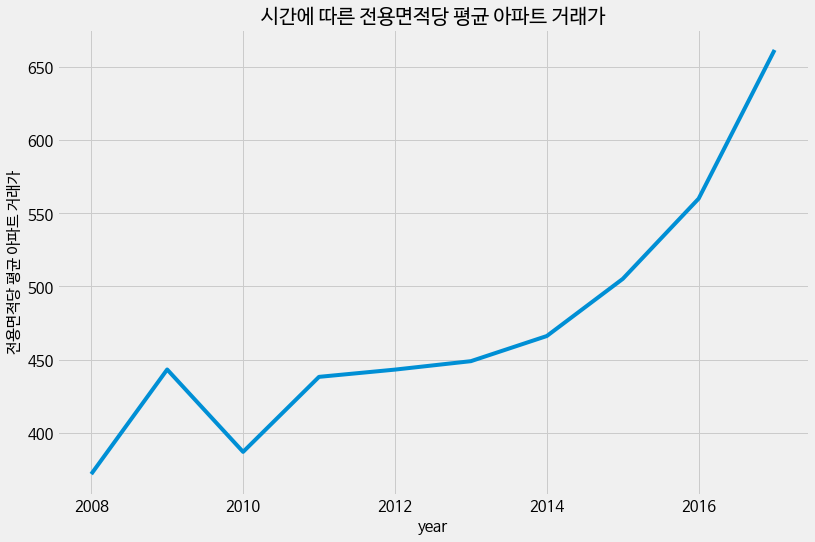

In [ ]:
# matplotlib의 line plot을 이용해서 전용면적당 평균 아파트 거래가의 추이를 시각화해봅시다.

plt.figure(figsize=(12, 8))
plt.plot(price_per_area_by_year.index, price_per_area_by_year['price_per_area'])
plt.title('시간에 따른 전용면적당 평균 아파트 거래가', size = 20)

plt.xticks(size = 15)
plt.yticks(size = 15)

plt.xlabel('year', size = 15)
plt.ylabel('전용면적당 평균 아파트 거래가', size = 15)
plt.show()

<font color=red>시간이 지날수록 전용면적당 평균 아파트 거래가가 증가하고 있네요! </font>

특히 2014년 이후에는 값이 가파르게 상승하고 있습니다.



다음으로 같은 상황에 대해서 **<font color=red>seaborn</font>**을 통해서도 그려봅시다.

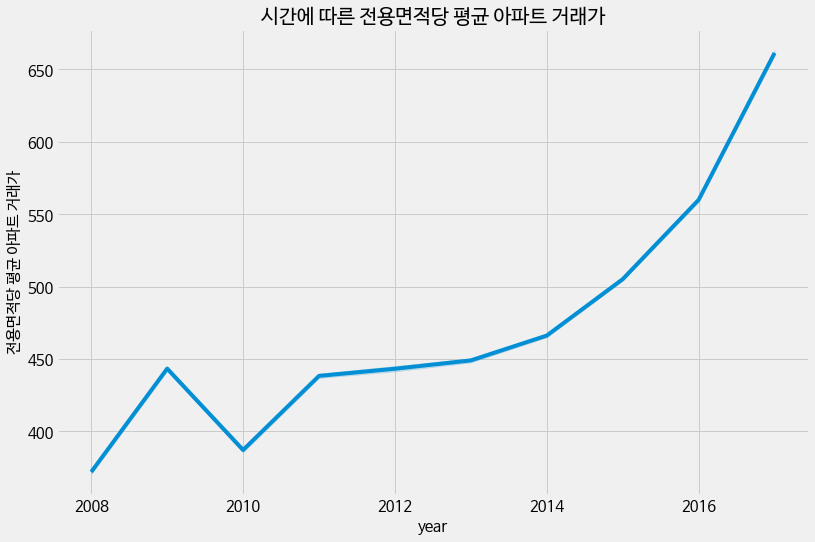

In [ ]:
# seaborn의 line plot을 이용해서 전용면적당 평균 아파트 거래가의 추이를 시각화해봅시다.

plt.figure(figsize=(12, 8))
sns.lineplot(x='year', y='price_per_area', data=train)
plt.title('시간에 따른 전용면적당 평균 아파트 거래가', size = 20)

plt.xticks(size = 15)
plt.yticks(size = 15)

plt.xlabel('year', size = 15)
plt.ylabel('전용면적당 평균 아파트 거래가', size = 15)
plt.show()

matplotlib을 사용했을 때와 동일하게 그래프를 그려줍니다.

그렇다면, 한 단계 나아가서! 이제는 익숙하시죠??

seaborn의 lineplot에서  <font color=red>hue = 'city'</font>라는 키워드를 통해 <font color=green>도시별로 시간에 따른 전용면적당 평균 아파트 거래가 추이</font>를 확인해봅시다. 



---



### 이변량 line plot

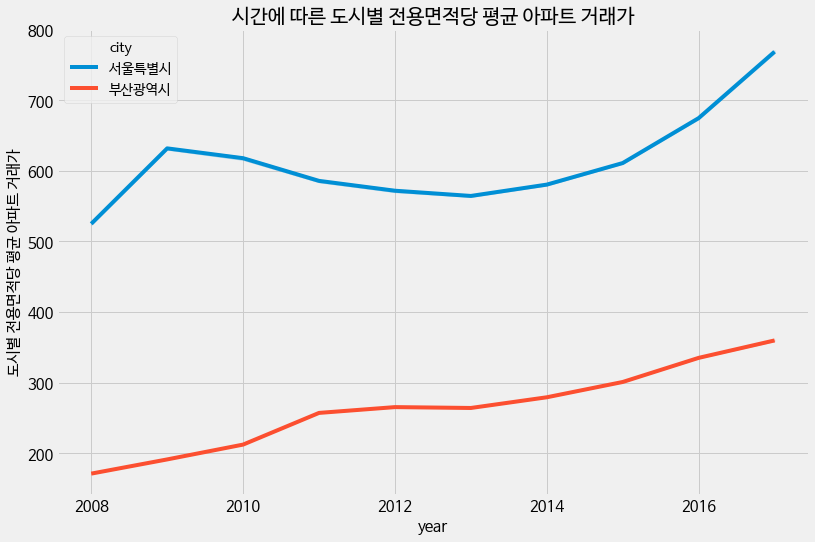

In [ ]:
# seaborn을 이용해서 도시별 전용면적당 평균 아파트 거래가 line plot를 그려봅시다.

plt.figure(figsize=(12, 8))
sns.lineplot(x='year', y='price_per_area', hue ='city' ,data=train)
plt.title('시간에 따른 도시별 전용면적당 평균 아파트 거래가', size = 20)

plt.xticks(size = 15)
plt.yticks(size = 15)

plt.xlabel('year', size = 15)
plt.ylabel('도시별 전용면적당 평균 아파트 거래가', size = 15)
plt.show() 

서울과 부산의 전용면적당 실거래가 차이는 있지만

두 도시 모두 <font color=red>시간이 지날수록 전용면적당 평균 아파트가가 높아짐</font>을 알 수 있네요!



또한

서울의 경우 2013년부터 전용면적당 평균 아파트 거래가가 증가하고 있고

부산은 그 이전부터 꾸준하게 평균 아파트 거래가가 증가하고 있습니다.



---



# 4. 결론

짝짝짝~ 시각화의 긴 여정이 막을 내렸습니다.🙌🙌🙌



지금까지 아파트 실거래가 데이터를 가지고 다양한 그래프를 그려봤는데요, 어떤가요?

어떤 상황에서 어떤 그래프를 써야겠다 감이 오시나요?

감이 아직 안오신다고요? 걱정마세요! 

저희가 마지막으로 정리한 것을 보고 다양한 데이터에 대해서 시각화해보면서 익숙해진다면, 시각화 고수의 경지에 오를 수 있답니다😉

1. **<font color=red>pie chart</font>** : 범주형 변수의 전체적인 비율 파악



2. **<font color=red>countplot</font>** : 범주의 개수가 많아서 pie chart가 복잡할 때, 범주형 데이터의 고유한 값 개수의 그래프


3. **<font color=red>barplot</font>** : 데이터의 개수가 아닌 평균, 최댓값 등을 범주 집계한 그래프


4. **<font color=red>히스토그램</font>** : 연속형 변수의 데이터 분포를 파악


5. **<font color=red>boxplot</font>** : 연속형 변수의 이상치와 데이터의 대략적인 분포의 그래프


6. **<font color=red>상관계수</font>** : 변수들 사이의 특정한 상관관계의 정도를 수치적으로 나타낸 계수


7. **<font color=red>scatterplot</font>** : 독립변수, 종속변수가 수치형 변수일때, 점을 찍은 산포도


8. **<font color=red>lmplot</font>** : scatterplot + 추세선


9. **<font color=red>lineplot</font>** : 시간에 따른 연속형 데이터의 추세 파악

꼭 Stage 3에서 다시 만나요~

---